<a href="https://colab.research.google.com/github/etrahadias/CS620Project/blob/main/Trahadias_CS620_DataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Travel](https://drive.google.com/uc?export=view&id=12ADuKga-IdVDh88RBrBmfocYSq6qtfdp)



# **Life After Lockdown: An Analysis of COVID-19's Impact on Travel Trends**

**Name:** Elizabeth Trahadias

**Email:** etrah001@odu.edu

**Portfolio:** https://etrahadias.github.io/


### **Abstract**

In March of 2020, the world temporarily shut down due to the COVID-19 pandemic. A lot of time was spent at home, businesses closed, holidays were celebrated via Zoom, and students and employees learned to work from home. Another major factor of life that was impacted by the pandemic was travel.

I am looking to explore how travel trends have evolved over 2019 and 2020. How has COVID-19 impacted the travel industry? I am curious to see if there is a relationship between the number of COVID-19 cases, the popularity of certain travel destinations, and the number of airline passengers. The **end goal** of the project is to visualize travel trends with COVID-19 statistics and to attempt to create a model that determines the relationship between airline passengers and number of COVID-19 cases.


#### **Goals**

The objectives of this project are to:

* Merge and clean multiple data sets
* Perform exploratory data analysis
* Practice data wrangling
* Analyze U.S. travel trends in 2019 versus travel trends during the COVID-19 pandemic (i.e. most popular airlines, common destinations and travel months, number of people traveling, total number of flights, the number of international flights, etc.)
* Determine if there is a relationship between number of positive U.S. COVID-19 cases vs number of people traveling on airplanes
* Create interactive visualizations that display popular U.S. travel destinations and airlines before and during the pandemic
* Create visualizations that show COVID-19 trends in the U.S.

#### **Data Sources**

There are multiple data sets needed to investigate the above objectives. The first 3 data sets are from the [Bureau of Transportation Statistics](https://www.transtats.bts.gov/Tables.asp?QO_VQ=EEE&QO_anzr=Nv4%FDPn44vr4%FDf6n6v56vp5%FD%FLS14z%FDHE%FDg4nssvp%FM-%FDNyy%FDPn44vr45&QO_fu146_anzr=Nv4%FDPn44vr45). I am using data from the T-100 Market (All Carriers) section. Air carriers report monthly air traffic information using the Form T-100, and it is entered into the Air Carrier Statistics database. The data sets display information like the number of airline passengers, the departures and destinations for flights entering into and departing from the U.S., and the month. Since each csv file represents a year (2019, 2020, & 2021), I will need to combine the 3 data sets into one for ease of analysis. A description of the variables in this data set can be found [here](https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4%20Pn44vr45&V0s1_b0yB=D).

The dataset with the COVID-19 case information is from the [CDC](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36/data), and it is a relatively messy data set. It appears the data was entered or submitted by users, and there are a lot of missing values. This data set contains information about the number of new COVID-19 cases and deaths by day per state in the United States. I will be using data from the [Census](https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-state-total.html) to obtain approximate numbers for the population per state in order to normalize the COVID-19 data.

Since the airplane flight data is broken down by month and the CDC data is broken down by day, I will have to clean the CDC data, organize it by month, and merge it with a modified version of the airline data to show the relationship between the number of COVID-19 cases and the number of people traveling per month.

#### **Project Timeline**

* **Abstract**: 08/31/21-9/14/21
* **Data cleaning and data wrangling**: 9/15/21-9/25/21
* **Exploratory data analysis & any left over data wrangling**: 9/26/21-10/4/21
* **Exploratory data analysis / Prep for Progress Check I**: 10/5/21-10/12/21
* **Create visualizations**: 10/13/21-10/27/21
* **Explore relationships and linear regression models:** 10/28/21-11/8/21
* **Prep for Progress Check II:** 11/9/21-11/16/21
* **Final touches and analyses:** 11/17/21-11/25/21
* **Prepare and proofread final report:** 11/26/21-12/2/21
* **Create video:** 12/3/21-12/10/21
* **Submit:** 12/10/21

    *Note: Project timeline is somewhat flexible, as roadblocks are to be expected and some sections may take longer than others.*

![Gantt](https://drive.google.com/uc?export=view&id=1QM9pOlmt9D2qioEgPEFUUK6jTjkgU8u5)

### **Importing the Data**


In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from numpy import nan as NaN
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount to Google Drive to import the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in primary data sets with Pandas
# These data sets show airline information (number of passengers, destinations, etc.)
flights19=pd.read_csv("/content/drive/My Drive/CS 620/Project/flights19.csv")
flights20=pd.read_csv("/content/drive/My Drive/CS 620/Project/flights20.csv")
flights21=pd.read_csv("/content/drive/My Drive/CS 620/Project/flights21.csv")

In [ ]:
# Show the first few lines of data for the 2019 airline data
flights19.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,9338.0,0.0,1408.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,11721,1172105,31721,FNT,"Flint, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
1,0.0,4642.0,0.0,466.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,12598,1259802,32598,JZT,"Arlington, TX",TX,48.0,Texas,US,United States,74,2019,2,4,1,P,DU,NaN
2,0.0,10513.0,0.0,1375.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,16091,1609105,31295,YIP,"Detroit, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
3,0.0,8894.0,0.0,1378.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,10874,1087402,30647,CAK,"Akron, OH",OH,39.0,Ohio,US,United States,44,13061,1306106,33038,LRD,"Laredo, TX",TX,48.0,Texas,US,United States,74,2019,2,4,3,P,DU,NaN
4,0.0,983.0,0.0,355.0,U7,20447,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54.0,West Virginia,US,United States,39,12265,1226505,32265,IAG,"Niagara Falls, NY",NY,36.0,New York,US,United States,22,2019,2,4,1,P,DU,NaN


In [ ]:
# Show the first few lines of data for the 2020 airline data
flights20.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,165.0,3641.0,373.0,KO,20341.0,Alaska Central Express,06019,D,KO,Alaska Central Express,1,5.0,15991,1599102,35991,YAK,"Yakutat, AK",AK,2.0,Alaska,US,United States,1,10299,1029906,30299,ANC,"Anchorage, AK",AK,2.0,Alaska,US,United States,1,2020,1,1,1,G,DU,NaN
1,0.0,751.0,161.0,557.0,KO,20341.0,Alaska Central Express,06019,D,KO,Alaska Central Express,1,5.0,10299,1029906,30299,ANC,"Anchorage, AK",AK,2.0,Alaska,US,United States,1,14738,1473802,34738,SDP,"Sandpoint, AK",AK,2.0,Alaska,US,United States,1,2020,1,1,2,L,DU,NaN
2,0.0,0.0,0.0,385.0,AN,21894.0,"ADVANCED AIR, LLC",01229,D,AN,"ADVANCED AIR, LLC",1,6.0,12127,1212702,32575,HHR,"Hawthorne, CA",CA,6.0,California,US,United States,91,15232,1523201,35232,TKF,"Truckee, CA",CA,6.0,California,US,United States,91,2020,1,1,1,F,DU,NaN
3,0.0,0.0,0.0,385.0,AN,21894.0,"ADVANCED AIR, LLC",01229,D,AN,"ADVANCED AIR, LLC",1,6.0,15232,1523201,35232,TKF,"Truckee, CA",CA,6.0,California,US,United States,91,12127,1212702,32575,HHR,"Hawthorne, CA",CA,6.0,California,US,United States,91,2020,1,1,1,F,DU,NaN
4,0.0,10362.0,0.0,4620.0,ADB,20110.0,Antonov Company,9488B,I,ADB,Antonov Company,0,0.0,15256,1525605,35256,TLS,"Toulouse, France",NaN,NaN,NaN,FR,France,427,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,2020,1,2,10,P,IF,NaN


In [ ]:
# Show the first few lines of data for the 2021 airline data
# Note: this data goes up to February 2021
flights21.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,732068.0,0.0,196.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,11823,1182304,31823,FWA,"Fort Wayne, IN",IN,18.0,Indiana,US,United States,42,2021,1,2,1,G,DU,NaN
1,0.0,619050.0,0.0,1630.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,10713,1071302,30713,BOI,"Boise, ID",ID,16.0,Idaho,US,United States,83,2021,1,2,4,G,DU,NaN
2,0.0,3966220.0,272048.0,942.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,14683,1468305,33214,SAT,"San Antonio, TX",TX,48.0,Texas,US,United States,74,2021,1,2,2,G,DU,NaN
3,0.0,998701.0,0.0,473.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,12448,1244807,32448,JAN,"Jackson/Vicksburg, MS",MS,28.0,Mississippi,US,United States,53,2021,1,2,1,G,DU,NaN
4,0.0,882144.0,0.0,1102.0,5X,19917,United Parcel Service,06910,D,5X,United Parcel Service,3,3,14730,1473004,33044,SDF,"Louisville, KY",KY,21.0,Kentucky,US,United States,52,13256,1325602,33256,MFE,"Mission/McAllen/Edinburg, TX",TX,48.0,Texas,US,United States,74,2021,1,2,3,G,DU,NaN


In [ ]:
# Read in secondary data set with Pandas
# This is data from the CDC that shows COVID-19 case information per state by day
covid=pd.read_csv("/content/drive/My Drive/CS 620/Project/COVID.csv")

In [ ]:
# Show the first few lines of data for the COVID-19 case information
covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,09/01/2021,ND,"118,491","107,475","11,016",536,66,"1,562",NaN,NaN,1,0,09/02/2021 01:49:05 PM,Agree,Not agree
1,02/02/2021,IL,"1,130,917","1,130,917",0,"2,304",0,"21,336","19,306","2,030",63,16,02/03/2021 02:55:58 PM,Agree,Agree
2,02/02/2021,MS,"280,182","176,228","103,954","1,059",559,"6,730","4,739","1,991",13,7,02/04/2021 12:00:00 AM,Agree,Agree
3,05/03/2020,NH,"2,518",NaN,NaN,89,0,86,NaN,NaN,2,0,05/04/2020 10:49:24 PM,Not agree,Not agree
4,07/31/2020,ND,"6,602","6,602",0,133,0,103,NaN,NaN,0,0,08/01/2020 02:38:12 PM,Agree,Not agree


In [ ]:
# Are there missing values in this data set?

covid.isnull().any()

submission_date    False
state              False
tot_cases          False
conf_cases          True
prob_cases          True
new_case           False
pnew_case           True
tot_death          False
conf_death          True
prob_death          True
new_death          False
pnew_death          True
created_at         False
consent_cases       True
consent_deaths      True
dtype: bool

It appears that at least 8 columns host missing data values in the COVID-19 data set.

In [ ]:
# Import the Census population data
pop=pd.read_csv("/content/drive/My Drive/CS 620/Project/nst-est2020.csv",
                usecols=['NAME', 'POPESTIMATE2019', 'POPESTIMATE2020'])
pop.head(10)

,NAME,POPESTIMATE2019,POPESTIMATE2020
0,United States,328329953,329484123
1,Northeast Region,56002934,55849869
2,Midwest Region,68340091,68316744
3,South Region,125686544,126662754
4,West Region,78300384,78654756
5,Alabama,4907965,4921532
6,Alaska,733603,731158
7,Arizona,7291843,7421401
8,Arkansas,3020985,3030522
9,California,39437610,39368078


### **Merging the Airline Data**

The `flights19`, `flights20`, and `flights21` data sets need to be combined into one. Each data set has the same column headers, so we simply need to connect all three data sets together.

In [ ]:
# Concatenate the 3 data frames

flights=pd.concat([flights19,flights20,flights21])

In [ ]:
# View the combined data

flights.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 41
0,0.0,9338.0,0.0,1408.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,11721,1172105,31721,FNT,"Flint, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
1,0.0,4642.0,0.0,466.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,12598,1259802,32598,JZT,"Arlington, TX",TX,48.0,Texas,US,United States,74,2019,2,4,1,P,DU,NaN
2,0.0,10513.0,0.0,1375.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10747,1074706,30747,BRO,"Brownsville, TX",TX,48.0,Texas,US,United States,74,16091,1609105,31295,YIP,"Detroit, MI",MI,26.0,Michigan,US,United States,43,2019,2,4,3,P,DU,NaN
3,0.0,8894.0,0.0,1378.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,10874,1087402,30647,CAK,"Akron, OH",OH,39.0,Ohio,US,United States,44,13061,1306106,33038,LRD,"Laredo, TX",TX,48.0,Texas,US,United States,74,2019,2,4,3,P,DU,NaN
4,0.0,983.0,0.0,355.0,U7,20447.0,USA Jet Airlines Inc.,06912,D,U7,USA Jet Airlines Inc.,2,2.0,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54.0,West Virginia,US,United States,39,12265,1226505,32265,IAG,"Niagara Falls, NY",NY,36.0,New York,US,United States,22,2019,2,4,1,P,DU,NaN


In [ ]:
# Get an idea of the shape of the data
flights.shape

# 596729 rows and 42 columns

(596729, 42)

### **Cleaning the Data**

Before the COVID-19 data can be merged with the data with the travel information, the data sets need to be cleaned, especially the COVID-19 data.

I am going to start the data wrangling process by cleaning the `flights` data set. I am going to remove unnecessary rows and columns and handle missing data values to make analysis easier and more effective.

In the first column of the `flights` data, any row where `PASSENGERS == 0` indicates that this is a freight or mail flight. I am only interested in passenger flights, so I am going to filter out any row where `PASSENGERS == 0`.

#### Cleaning the Flights Data



In [ ]:
# I prefer all lower case column titles, so I will change them to lower case
flights.columns= flights.columns.str.lower()

# Remove data where passengers==0
flights=flights[flights.passengers != 0]

# See how many rows we have now
flights.shape

(471985, 42)

We now have 471,985 rows and 42 columns in our DataFrame that consists of passenger only data. There are a few columns that contain duplicate or irrelevant data. I am going to remove these columns. There is one column in our DataFrame that consists of null, or NaN, values. I am going to remove this column, too, as it does not impact the analysis.


In [ ]:
# Get a list of the columns
flights.columns

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'airline_id', 'unique_carrier_name', 'unique_carrier_entity', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_fips',
       'origin_state_nm', 'origin_country', 'origin_country_name',
       'origin_wac', 'dest_airport_id', 'dest_airport_seq_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_fips', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'dest_wac', 'year', 'quarter', 'month', 'distance_group', 'class',
       'data_source', 'unnamed: 41'],
      dtype='object')

In [ ]:
# Remove unnecessary columns
flights = flights.drop(['freight', 'mail', 'unique_carrier',
                        'unnamed: 41', 'airline_id', 
                        'unique_carrier_entity', 'carrier', 'origin_airport_id',
                        'origin_airport_seq_id', 'origin_city_market_id',
                        'origin_state_fips', 'origin_wac', 'dest_airport_id',
                        'dest_airport_seq_id', 'dest_city_market_id', 
                        'dest_state_fips', 'dest_wac'], axis=1)

In [ ]:
# Checking out our new DataFrame
flights.head()

,passengers,distance,unique_carrier_name,region,carrier_name,carrier_group,carrier_group_new,origin,origin_city_name,origin_state_abr,origin_state_nm,origin_country,origin_country_name,dest,dest_city_name,dest_state_abr,dest_state_nm,dest_country,dest_country_name,year,quarter,month,distance_group,class,data_source
57517,1.0,8.0,Smokey Bay Air Inc.,D,Smokey Bay Air Inc.,1,5.0,PGM,"Port Graham, AK",AK,Alaska,US,United States,SOV,"Seldovia, AK",AK,Alaska,US,United States,2019,2,6,1,F,DU
57518,1.0,46.0,Island Air Service,D,Island Air Service,1,5.0,A43,"Kodiak Island, AK",AK,Alaska,US,United States,KPR,"Port Williams, AK",AK,Alaska,US,United States,2019,2,6,1,F,DU
57519,1.0,26.0,Island Air Service,D,Island Air Service,1,5.0,A43,"Kodiak Island, AK",AK,Alaska,US,United States,KPY,"Port Bailey, AK",AK,Alaska,US,United States,2019,2,6,1,L,DU
57520,1.0,43.0,Island Air Service,D,Island Air Service,1,5.0,A43,"Kodiak Island, AK",AK,Alaska,US,United States,KWP,"West Point, AK",AK,Alaska,US,United States,2019,2,6,1,L,DU
57521,1.0,93.0,Island Air Service,D,Island Air Service,1,5.0,ALZ,"Lazy Bay, AK",AK,Alaska,US,United States,A43,"Kodiak Island, AK",AK,Alaska,US,United States,2019,2,6,1,L,DU


In [ ]:
# Checking for null values
print(flights.isnull().values.any())
print(flights.isnull().sum())

True
passengers                 0
distance                   0
unique_carrier_name        2
region                     2
carrier_name               2
carrier_group              0
carrier_group_new          2
origin                     0
origin_city_name           0
origin_state_abr       37130
origin_state_nm        37130
origin_country             0
origin_country_name        0
dest                       0
dest_city_name             0
dest_state_abr         36831
dest_state_nm          36831
dest_country               0
dest_country_name          0
year                       0
quarter                    0
month                      0
distance_group             0
class                      0
data_source                0
dtype: int64


In the code below, I am examining why there are null values in origin_state_abr, origin_state_nm, dest_state_abr, and dest_state_nm. My initial thought is that these are international flights.

In [ ]:
# Make a DataFrame that only consists of rows with NaN values
is_NaN = flights.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = flights[row_has_NaN]
rows_with_NaN

,passengers,distance,unique_carrier_name,region,carrier_name,carrier_group,carrier_group_new,origin,origin_city_name,origin_state_abr,origin_state_nm,origin_country,origin_country_name,dest,dest_city_name,dest_state_abr,dest_state_nm,dest_country,dest_country_name,year,quarter,month,distance_group,class,data_source
57739,1.0,4288.0,Blue Jet SP Z o o,I,Blue Jet SP Z o o,0,0.0,LED,"St. Petersburg, Russia",NaN,NaN,RU,Russia,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,2019,1,2,9,L,IF
57740,1.0,4288.0,Blue Jet SP Z o o,I,Blue Jet SP Z o o,0,0.0,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,LED,"St. Petersburg, Russia",NaN,NaN,RU,Russia,2019,1,2,9,L,IF
57741,1.0,94.0,Talofa Airways Limited,I,Talofa Airways Limited,0,0.0,PPG,"Pago Pago, TT",TT,U.S. Pacific Trust Territories and Possessions,US,United States,APW,"Apia, Samoa",NaN,NaN,WS,Samoa,2019,1,2,1,F,IF
57765,1.0,3470.0,Albinati aviation Limited,I,Albinati aviation Limited,0,0.0,DUB,"Dublin, Ireland",NaN,NaN,IE,Ireland,PTK,"Pontiac, MI",MI,Michigan,US,United States,2019,1,2,7,L,IF
57766,1.0,4040.0,Albinati aviation Limited,I,Albinati aviation Limited,0,0.0,EWR,"Newark, NJ",NJ,New Jersey,US,United States,LIN,"Milan, Italy",NaN,NaN,IT,Italy,2019,1,2,9,L,IF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,21330.0,1475.0,JetBlue Airways,L,JetBlue Airways,3,3.0,JFK,"New York, NY",NY,New York,US,United States,STI,"Santiago, Dominican Republic",NaN,NaN,DO,Dominican Republic,2021,1,1,3,F,IU
39601,22146.0,1028.0,American Airlines Inc.,L,American Airlines Inc.,3,3.0,DFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States,CUN,"Cancun, Mexico",NaN,NaN,MX,Mexico,2021,1,1,3,F,IU
39619,24057.0,1549.0,JetBlue Airways,L,JetBlue Airways,3,3.0,SDQ,"Santo Domingo, Dominican Republic",NaN,NaN,DO,Dominican Republic,JFK,"New York, NY",NY,New York,US,United States,2021,1,1,4,F,IU
39669,29170.0,1028.0,American Airlines Inc.,L,American Airlines Inc.,3,3.0,CUN,"Cancun, Mexico",NaN,NaN,MX,Mexico,DFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States,2021,1,1,3,F,IU


We can see that my initial thought was right. I am going to change the NaN values to "International" so they are not missing and so I can do further analysis on that column.

In [ ]:
# Write a code if the origin/dest country is not the US, change
# origin_state_abr, origin_state_nm, dest_state_abr, and dest_state_nm
# to International so they are not missing

flights.loc[:,['origin_state_abr', 'origin_state_nm',
              'dest_state_abr', 'dest_state_nm']]= flights.loc[:,['origin_state_abr',
                                                  'origin_state_nm', 'dest_state_abr', 
                                                  'dest_state_nm']].fillna('International')
# Check to make sure we removed the NaN values in these columns
print(flights.isnull().values.any())
print(flights.isnull().sum())

True
passengers             0
distance               0
unique_carrier_name    2
region                 2
carrier_name           2
carrier_group          0
carrier_group_new      2
origin                 0
origin_city_name       0
origin_state_abr       0
origin_state_nm        0
origin_country         0
origin_country_name    0
dest                   0
dest_city_name         0
dest_state_abr         0
dest_state_nm          0
dest_country           0
dest_country_name      0
year                   0
quarter                0
month                  0
distance_group         0
class                  0
data_source            0
dtype: int64


In [ ]:
# Review the rows with the remaning few NaN values

is_NaN = flights.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = flights[row_has_NaN]
rows_with_NaN

,passengers,distance,unique_carrier_name,region,carrier_name,carrier_group,carrier_group_new,origin,origin_city_name,origin_state_abr,origin_state_nm,origin_country,origin_country_name,dest,dest_city_name,dest_state_abr,dest_state_nm,dest_country,dest_country_name,year,quarter,month,distance_group,class,data_source
119951,177.0,602.0,NaN,NaN,NaN,1,NaN,TPA,"Tampa, FL",FL,Florida,US,United States,GCM,"Grand Cayman, Cayman Islands",International,International,KY,Cayman Islands,2020,1,1,2,L,IU
123832,231.0,602.0,NaN,NaN,NaN,1,NaN,GCM,"Grand Cayman, Cayman Islands",International,International,KY,Cayman Islands,TPA,"Tampa, FL",FL,Florida,US,United States,2020,1,1,2,L,IU


In [ ]:
# Update the above NaN values with `Unknown`
flights.loc[:,['unique_carrier_name',	'region', 'carrier_name', 
               'carrier_group_new']]=flights.loc[:,['unique_carrier_name', 
                                                    'region', 'carrier_name',
                                  'carrier_group_new']].fillna('Unknown')

# Check to make sure we removed the NaN values in these columns
print(flights.isnull().values.any())

False


I anticipate that I will need a few versions of the flight data. The first version will be the version that has been created above. I will use this version to analyze travel trends in 2019 versus travel trends during the COVID-19 pandemic (i.e. most popular airlines, common destinations and travel months, number of people traveling, total number of flights, the number of international flights, etc.). 

The next version of the data set, which I will create below, will be the one I merge with the COVID-19 data to see the relationship between the number of people traveling each month and the confirmed number of COVID-19 cases. These data sets will need to be grouped by month and possibly by state, depending on the analysis I am looking to do.

In [ ]:
flights.columns

Index(['passengers', 'distance', 'unique_carrier_name', 'region',
       'carrier_name', 'carrier_group', 'carrier_group_new', 'origin',
       'origin_city_name', 'origin_state_abr', 'origin_state_nm',
       'origin_country', 'origin_country_name', 'dest', 'dest_city_name',
       'dest_state_abr', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'year', 'quarter', 'month', 'distance_group', 'class', 'data_source'],
      dtype='object')

In [ ]:
# Create a date column where the month and year are combined
flights['date'] = flights[["year", "month"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
flights['date']=pd.to_datetime(flights['date'])

In [ ]:
flights2=flights.drop(['region', 'origin', 'origin_city_name', 
       'origin_state_abr', 'origin_state_nm', 'origin_country_name', 
       'dest', 'dest_city_name', 'dest_state_abr', 'dest_state_nm', 
       'dest_country_name', 'quarter', 'distance_group', 'class',
       'data_source'], axis=1)

# Finding the number of passengers for each month
flights2=flights2.groupby(['year', 'month', 'date'], as_index=False).agg({"passengers": "sum"})
flights2

,year,month,date,passengers
0,2019,1,2019-01-01,76927270.0
1,2019,2,2019-02-01,72149249.0
2,2019,3,2019-03-01,90766871.0
3,2019,4,2019-04-01,87177374.0
4,2019,5,2019-05-01,92577085.0
5,2019,6,2019-06-01,95766379.0
6,2019,7,2019-07-01,99421298.0
7,2019,8,2019-08-01,96224458.0
8,2019,9,2019-09-01,83142668.0
9,2019,10,2019-10-01,89246813.0


Next, I will make two additional DataFrames. Each data set will contain information on the number of passengers for each month based on the origin or the destination state.

In [ ]:
# Look at passengers by origin location per month per year
flights_origin=flights.groupby(['year', 'month', 'origin_state_nm'], as_index=False).agg({"passengers": "sum"})
flights_origin

,year,month,origin_state_nm,passengers
0,2019,1,Alabama,193814.0
1,2019,1,Alaska,299951.0
2,2019,1,Alberta,183064.0
3,2019,1,Arizona,2005903.0
4,2019,1,Arkansas,138903.0
...,...,...,...,...
1589,2021,2,Virginia,517460.0
1590,2021,2,Washington,769519.0
1591,2021,2,West Virginia,10168.0
1592,2021,2,Wisconsin,159949.0


In [ ]:
# Look at passengers by destination location per month per year

flights_dest=flights.groupby(['year', 'month', 'dest_state_nm'], as_index=False).agg({"passengers": "sum"})
flights_dest

,year,month,dest_state_nm,passengers
0,2019,1,Alabama,200309.0
1,2019,1,Alaska,311407.0
2,2019,1,Alberta,175164.0
3,2019,1,Arizona,2069615.0
4,2019,1,Arkansas,139858.0
...,...,...,...,...
1591,2021,2,Virginia,506761.0
1592,2021,2,Washington,758342.0
1593,2021,2,West Virginia,9522.0
1594,2021,2,Wisconsin,148831.0


#### Cleaning the Census Population Data

In order to clean the population data, we will check for null values and change the state names to abbreviations to merge it with the COVID-19 data.

In [ ]:
# Check to find null values
print(pop.isnull().values.any())

False


In [ ]:
# Change columns to lower case
pop.columns= pop.columns.str.lower()

In [ ]:
# Add a column with state abbreviations

# Create a dictionary with state names and abbreviations
abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Add a new column
pop['state'] = pop['name'].map(abbrev)
pop.head(10)

,name,popestimate2019,popestimate2020,state
0,United States,328329953,329484123,NaN
1,Northeast Region,56002934,55849869,NaN
2,Midwest Region,68340091,68316744,NaN
3,South Region,125686544,126662754,NaN
4,West Region,78300384,78654756,NaN
5,Alabama,4907965,4921532,AL
6,Alaska,733603,731158,AK
7,Arizona,7291843,7421401,AZ
8,Arkansas,3020985,3030522,AR
9,California,39437610,39368078,CA


#### Cleaning the COVID-19 Data

It is time to clean and explore the COVID-19 data to get it into a usable format for analysis. For ease of handling and processing speed, I am going to remove columns I do not anticipate working with.


In [ ]:
# Drop columns I will not be using

covid = covid.drop(['created_at', 'consent_cases', 'consent_deaths'], axis=1)

In [ ]:
# Let's check the data type of each column
covid.dtypes

submission_date    object
state              object
tot_cases          object
conf_cases         object
prob_cases         object
new_case           object
pnew_case          object
tot_death          object
conf_death         object
prob_death         object
new_death           int64
pnew_death         object
dtype: object

We can see that only one column is in numeric format. This is a problem since we would anticipate most of the data to be numerical. Let's handle missing values then change the data to numeric to perform calculations.

We need to convert the string values to integer values so that calculations can be performed.

In [ ]:
covid.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death'],
      dtype='object')

Before the string values can be changed to integers or floats, the comma values need to be removed in order for Python to parse the values.

In [ ]:
# Remove commas
covid = covid.replace(',','', regex=True)

In [ ]:
# Change string values to float values for every column except
# 'submission_date' and 'state'

covid[['tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death']] = covid[['tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death']].apply(pd.to_numeric)

# Check to make sure the columns with numbers are now integer values
print(covid.dtypes)

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
dtype: object


There are a few ways to handle missing data. I can either remove the rows with missing data entirely, replace the missing value with the mean of the column, interpolate, or replace the missing value with 0. I am not going to remove the rows entirely because that would remove a lot of useful data. For now, I am going to replace the missing values with 0 and see how that impacts my analysis.

In [ ]:
# Checking for null values
print(covid.isnull().sum())

# View the shape of the DF
print(covid.shape)

submission_date        0
state                  0
tot_cases              0
conf_cases         17603
prob_cases         17674
new_case               0
pnew_case           4096
tot_death              0
conf_death         17180
prob_death         17180
new_death              0
pnew_death          4157
dtype: int64
(35640, 12)


In [ ]:
# Replace missing values with 0
covid.fillna(0, inplace=True)

In order to merge the COVID-19 data with the flights data, I need to get the data into a similar format. The flights data is broken up by month and by year, so I need to do the same for the COVID-19 data.

In [ ]:
# Create a new column called 'year'
covid['year']=pd.DatetimeIndex(covid['submission_date']).year

# Create a new column called 'month'
covid['month']=pd.DatetimeIndex(covid['submission_date']).month

# View new dataframe
covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,year,month
0,09/01/2021,ND,118491,107475.0,11016.0,536,66.0,1562,0.0,0.0,1,0.0,2021,9
1,02/02/2021,IL,1130917,1130917.0,0.0,2304,0.0,21336,19306.0,2030.0,63,16.0,2021,2
2,02/02/2021,MS,280182,176228.0,103954.0,1059,559.0,6730,4739.0,1991.0,13,7.0,2021,2
3,05/03/2020,NH,2518,0.0,0.0,89,0.0,86,0.0,0.0,2,0.0,2020,5
4,07/31/2020,ND,6602,6602.0,0.0,133,0.0,103,0.0,0.0,0,0.0,2020,7


Let's remove any values that are negative for new case. It would not make sense to have negative COVID-19 case numbers.

In [ ]:
covid = covid[covid["new_case"] >= 0]

If we want to see how the U.S. total has changed in terms of the 7-day moving average, we can convert the `submission_date` column to a date value, sort by the date column, and then use the `rolling()` function with window size = 7 to calculate the rolling average for the total number of COVID-19 cases. Let's do that below.

In [ ]:
rolling=covid.groupby(['submission_date'], as_index=False).agg({"new_case":"sum", 
                                                     "new_death":"sum",})
rolling['submission_date']=pd.to_datetime(rolling['submission_date'])
rolling=rolling.sort_values(by="submission_date")

# Calculate 7-day moving average
rolling['7dayave']=rolling['new_case'].rolling(window=7).mean()
rolling.head(10)

,submission_date,new_case,new_death,7dayave
21,2020-01-22,33,0,NaN
23,2020-01-23,2,0,NaN
25,2020-01-24,1,0,NaN
27,2020-01-25,3,0,NaN
29,2020-01-26,3,0,NaN
31,2020-01-27,1,0,NaN
33,2020-01-28,1,0,6.285714
35,2020-01-29,1,0,1.714286
37,2020-01-30,2,0,1.714286
39,2020-01-31,4,0,2.142857


Now that the COVID-19 data has a month and year column, I want to see the sum of cases per month so that I can merge it with the airline data. I've chosen to sum together the values in the `new_case` and `new_death` columns by year and month since they are not aggregate values. `tot_cases` is an aggregate count of cases for each state, and if I were to sum this column, I would not be getting an accurate representation of cases.

In [ ]:
covid2=covid.groupby(['year','month'], as_index=False).agg({"new_case":"sum", 
                                                     "new_death":"sum",})
# Create an alternate version of the date with month and year combined
covid2['date'] = covid2[["month", "year"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
covid2['date']=pd.to_datetime(covid2['date'])
covid2.head()

,year,month,new_case,new_death,date
0,2020,1,51,0,2020-01-01
1,2020,2,494,4,2020-02-01
2,2020,3,226762,5139,2020-03-01
3,2020,4,883083,60811,2020-04-01
4,2020,5,753930,41986,2020-05-01


We can also make a version of the COVID-19 data that shows a by state and by month view.

In [ ]:
covid3=covid.groupby(['state','year','month'], as_index=False).agg({"new_case":"sum", 
                                                     "new_death":"sum",}).sort_values("new_case")
covid3.head()

,state,year,month,new_case,new_death
0,AK,2020,1,0,0
169,DC,2020,2,0,0
950,PW,2020,6,0,0
949,PW,2020,5,0,0
948,PW,2020,4,0,0


To get an accurate view of cases by state, we want to normalize the COVID-19 data since each state has a different population. To do this, we can use the formula:

`rate_per_100k = (cases / population_denominator) * 100000`

In [ ]:
# COVID data by state, but NORMALIZED CASE NUMBERS
import calendar
from datetime import datetime

covid_norm=pd.merge(covid3,pop)
covid_norm['rate_per_100k_case']= (covid_norm.new_case/covid_norm.popestimate2020) * 100000
covid_norm['rate_per_100k_death']= (covid_norm.new_death/covid_norm.popestimate2020) * 100000
covid_norm=covid_norm.sort_values('rate_per_100k_case', ascending=True)

# Add a new date column
flights['date'] = flights[["year", "month"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
flights['date']=pd.to_datetime(flights['date'])

# Change date format so the slider works in the right order for the COVID-19 visualizations
covid_norm['month']=covid_norm['month'].apply(lambda x: calendar.month_abbr[x])
covid_norm['date'] = covid_norm[["year", "month"]].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")
covid_norm['date']=pd.to_datetime(covid_norm['date'])
covid_norm["date"] = pd.to_datetime(covid_norm["date"]).dt.strftime('%Y %m')
covid_norm['date']=covid_norm['date'].astype('string')
covid_norm.head()

,state,year,month,new_case,new_death,name,popestimate2019,popestimate2020,rate_per_100k_case,rate_per_100k_death,date
0,AK,2020,Jan,0,0,Alaska,733603,731158,0.0,0.0,2020 01
357,MS,2020,Feb,0,0,Mississippi,2978227,2966786,0.0,0.0,2020 02
358,MS,2020,Jan,0,0,Mississippi,2978227,2966786,0.0,0.0,2020 01
378,IA,2020,Jan,0,0,Iowa,3159596,3163561,0.0,0.0,2020 01
379,IA,2020,Feb,0,0,Iowa,3159596,3163561,0.0,0.0,2020 02


The below data set is the total number of COVID-19 cases in the U.S. by month. It includes both normalized and non-normalized case numbers.

In [ ]:
covid_norm2=covid_norm.groupby(['year','month'], as_index=False).agg({"new_case":"sum", 
                                                                      "new_death":"sum",
                                                                      "rate_per_100k_case":"sum", 
                                                                      "rate_per_100k_death":"sum",})
# Create an alternate version of the date with month and year combined
covid_norm2['date'] = covid_norm2[["month", "year"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
covid_norm2['date']=pd.to_datetime(covid_norm2['date'])
covid_norm2=covid_norm2.drop('month', axis=1)
covid_norm2.head()

,year,new_case,new_death,rate_per_100k_case,rate_per_100k_death,date
0,2020,762659,44068,11488.542875,631.800169,2020-04-01
1,2020,1409357,30626,20570.952763,373.910872,2020-08-01
2,2020,6431551,87869,96272.993063,1455.586578,2020-12-01
3,2020,494,4,2.929286,0.038397,2020-02-01
4,2020,51,0,0.944012,0.000000,2020-01-01


### **Merging the Airline and COVID-19 Data**

Now that the data sets have been cleaned, it is time to merge the data sets so that data exploration and data analysis can be performed next. The merged data includes information about the date, the number of passengers, and the number of COVID-19 cases (both normalized and non-normalized).

In [ ]:
merged=pd.merge(flights2, covid_norm2)
merged

,year,month,date,passengers,new_case,new_death,rate_per_100k_case,rate_per_100k_death
0,2020,1,2020-01-01,80971661.0,51,0,0.944012,0.000000
1,2020,2,2020-02-01,76073160.0,494,4,2.929286,0.038397
2,2020,3,2020-03-01,43629663.0,172790,3393,2241.358082,52.374254
3,2020,4,2020-04-01,3333681.0,762659,44068,11488.542875,631.800169
4,2020,5,2020-05-01,8285953.0,721197,38331,11503.142323,593.042558
5,2020,6,2020-06-01,17046319.0,909266,20068,11769.148294,290.466738
6,2020,7,2020-07-01,24880601.0,1954135,31259,24474.748428,356.659862
7,2020,8,2020-08-01,26307350.0,1409357,30626,20570.952763,373.910872
8,2020,9,2020-09-01,26270531.0,1202471,21032,21153.539552,318.443613
9,2020,10,2020-10-01,31168261.0,1927075,23640,39512.730892,441.969181


We can also make a second version of our merged data that shows the data by state. This data will look at the state as the passengers' destination. As we continue our analysis, this data will help us see if passengers are traveling to states with high numbers of COVID-19.

In [ ]:
# Make a data frame that shows the number of passengers by destination state for each month
flights_dest2=flights.groupby(['date', 'dest_state_abr'], as_index=False).agg({"passengers": "sum"})
flights_dest2=flights_dest2.rename(columns={"dest_state_abr": "state"})

covid_norm3=covid_norm.groupby(['year','month', 'state'], as_index=False).agg({"new_case":"sum", 
                                                                      "new_death":"sum",
                                                                      "rate_per_100k_case":"sum", 
                                                                      "rate_per_100k_death":"sum",})
# Create an alternate version of the date with month and year combined
covid_norm3['date'] = covid_norm3[["month", "year"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
covid_norm3['date']=pd.to_datetime(covid_norm3['date'])
covid_norm3=covid_norm3.drop('month', axis=1)

# Merge the data
merged2=pd.merge(flights_dest2, covid_norm3)
merged2.head()

,date,state,passengers,year,new_case,new_death,rate_per_100k_case,rate_per_100k_death
0,2020-01-01,AK,358495.0,2020,0,0,0.000000,0.0
1,2020-01-01,AL,208057.0,2020,44,0,0.894031,0.0
2,2020-01-01,AR,153362.0,2020,0,0,0.000000,0.0
3,2020-01-01,AZ,2175622.0,2020,1,0,0.013475,0.0
4,2020-01-01,CA,9311314.0,2020,3,0,0.007620,0.0


### **Data Exploration**

Let's explore and understand our data visually before we try to analyze it and create visualizations. For each data set, let's look at the shape of our data and try to see if there are any outliers, anomalies, or patterns in the data.

#### Exploring the Flights Data

* Popular airlines
* Popular destinations
* How number of passengers have changed year by year / month by month

In [ ]:
# Set the theme for our visualizations to make them more stylized
sns.set_theme(style="whitegrid")

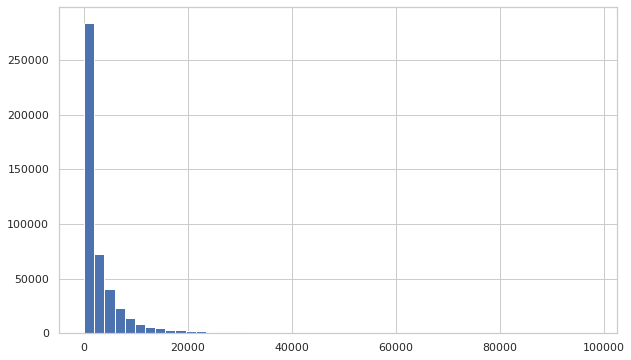

In [ ]:
# Histograms to get an idea of the shape of the data

# Here we are looking at just the passenger distribution
flights['passengers'].hist(bins=50)

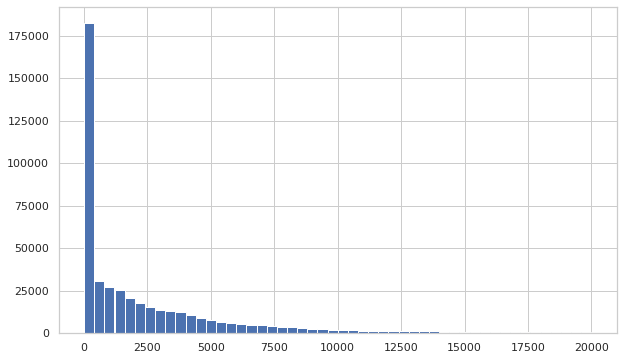

In [ ]:
# Zoom in on the data
flights20000=flights[flights['passengers']<20000]
flights20000['passengers'].hist(bins=50)

We can see that the data is skewed to the right, meaning the monthly total of passengers for each flight was on the smaller side. Most of the data falls in the first bin.

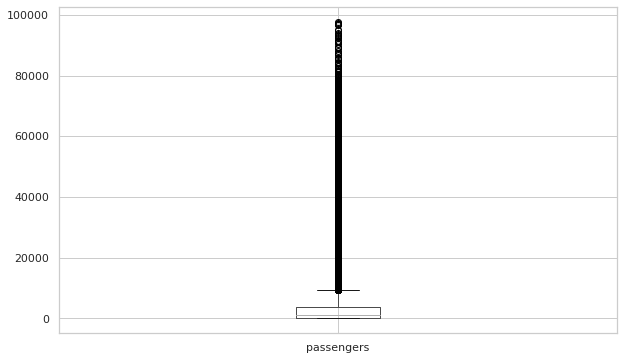

In [ ]:
# Box plot to review shape of the data and any outliers for the flights data
# Looking at just the passengers
flights.boxplot(column=["passengers"])

By looking at the distribution of the flight data, we can see that it is skewed right, and there are quite a few outliers.

In [ ]:
# Looking at total number of passengers per airline from 2019-2021
flights.groupby(by=["carrier_name"]).sum().sort_values("passengers", ascending=False)

,passengers,distance,carrier_group,year,quarter,month,distance_group
carrier_name,,,,,,,
Southwest Airlines Co.,239982441.0,82234004.0,221793,149303731,174751,449158,200032
American Airlines Inc.,230434647.0,38284660.0,77619,52250853,60632,155065,89875
Delta Air Lines Inc.,225606137.0,48243715.0,94875,63866284,73438,187641,112777
United Air Lines Inc.,159779711.0,50661021.0,81783,55052260,64983,167112,114647
SkyWest Airlines Inc.,65806366.0,18645019.0,97587,65693823,76178,195003,53751
...,...,...,...,...,...,...,...
Luxaviation Germany GmbH,8.0,8119.0,0,4038,8,20,17
TAG Aviation S.A.,7.0,15511.0,0,8076,4,10,32
Jet Aviation Business Jets AG,6.0,12132.0,0,6057,3,9,26


By looking at the above list, we can see some of the most popular airlines during 2019-2021. The below data explores U.S. only flights.

In [ ]:
# Make a Data Frame for US flights only
flights_US=flights[(flights['origin_country']=='US')& (flights['dest_country']=='US')]
most_US=DataFrame(flights_US.groupby(by=["carrier_name"]).sum())
most_US=most_US.sort_values("passengers", ascending=False)

# Top 10 airlines with the largest total number of passengers based on US flights only
most_US.iloc[0:11]

,passengers,distance,carrier_group,year,quarter,month,distance_group
carrier_name,,,,,,,
Southwest Airlines Co.,234361899.0,80095020.0,216348,145638640,170688,438794,194875
Delta Air Lines Inc.,191830437.0,24037268.0,70971,47775790,55589,142179,60259
American Airlines Inc.,190178164.0,19468885.0,53397,35945790,42146,107826,48195
United Air Lines Inc.,122110548.0,23308662.0,54519,36699664,43872,112970,55448
SkyWest Airlines Inc.,63954426.0,17894738.0,94695,63747062,74026,189531,51759
Spirit Air Lines,50361389.0,11679516.0,33243,22378496,26598,68314,28652
JetBlue Airways,46782458.0,11089826.0,28881,19442381,22940,58842,27410
Alaska Airlines Inc.,46541103.0,12117772.0,24669,16606538,19289,49323,28390
Frontier Airlines Inc.,34429690.0,12702328.0,37683,25367006,30051,77174,32091


In [ ]:
# See how the number of passengers changed year over year by US flights
flightsum=flights_US.groupby(["year"]).sum()
flightsum

,passengers,distance,carrier_group,quarter,month,distance_group
year,,,,,,
2019,813886554.0,167971643.0,511250,526453,1372836,448563
2020,336386085.0,116729798.0,374625,358251,923956,314241
2021,49035586.0,20044225.0,62620,24667,36185,53207


We can see the big change from 2019 to 2020. Please note that 2021 only includes data from the first two months of the year, which is why the value is significantly smaller. 

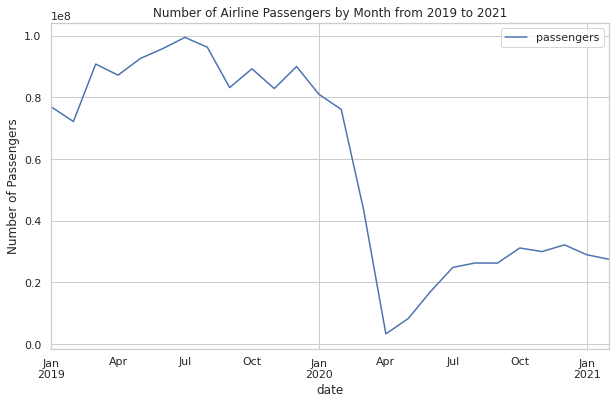

In [ ]:
# Plot a line chart of overall passenger by month
flights2.plot.line(x='date', y='passengers')
plt.ylabel("Number of Passengers")
plt.title("Number of Airline Passengers by Month from 2019 to 2021")
plt.show()

As expected, we can see that the overall number of passengers declined rapidly at the start of the COVID-19 pandemic (March 2020).

In [ ]:
# Find the percent of passenger share for all years (2019-2021)
top_US=DataFrame(most_US.iloc[0:11,0])
top_US['percent']=top_US.passengers/top_US.passengers.sum()
top_US

,passengers,percent
carrier_name,,
Southwest Airlines Co.,234361899.0,0.226731
Delta Air Lines Inc.,191830437.0,0.185585
American Airlines Inc.,190178164.0,0.183986
United Air Lines Inc.,122110548.0,0.118135
SkyWest Airlines Inc.,63954426.0,0.061872
Spirit Air Lines,50361389.0,0.048722
JetBlue Airways,46782458.0,0.045259
Alaska Airlines Inc.,46541103.0,0.045026
Frontier Airlines Inc.,34429690.0,0.033309


In [ ]:
## JUST THE TOP 4 - for all flights (US and international)

# If the airline is not one of the top 4, change it's name to other
pop=["Southwest Airlines Co.", "Delta Air Lines Inc.", "American Airlines Inc.", "United Air Lines Inc."]
flights_US.loc[~flights_US['carrier_name'].isin(pop), "carrier_name"] = "Other"
flights_group=flights_US.groupby(["carrier_name"]).sum()
flights_group['percent']=flights_group.passengers/flights_group.passengers.sum()
flights_group.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2019
flights_group19=flights_US[flights_US['year']==2019]
flights_group19=flights_group19.groupby(["carrier_name"]).sum()
flights_group19['percent']=flights_group19.passengers/flights_group19.passengers.sum()
flights_group19.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2020
flights_group20=flights_US[flights_US['year']==2020]
flights_group20=flights_group20.groupby(["carrier_name"]).sum()
flights_group20['percent']=flights_group20.passengers/flights_group20.passengers.sum()
flights_group20.sort_values("percent", ascending=False)

,passengers,distance,carrier_group,year,quarter,month,distance_group,percent
carrier_name,,,,,,,,
Other,134680426.0,62011570.0,223038,201658620,238993,616091,179906,0.400375
Southwest Airlines Co.,66606949.0,30094308.0,83904,56495360,66165,171596,73575,0.198007
American Airlines Inc.,56676021.0,8005413.0,22161,14921740,17560,45034,19879,0.168485
Delta Air Lines Inc.,48382072.0,8997823.0,26817,18056780,20754,53186,22602,0.143829
United Air Lines Inc.,30040617.0,7620684.0,18705,12594700,14779,38049,18279,0.089304


In [ ]:
## For US Flights

# If the airline is not a popular one, change it's name to other
flights_US.loc[~flights_US['carrier_name'].isin(list(top_US.index)), "carrier_name"] = "Other"
flights_group=flights_US.groupby(["carrier_name"]).sum()
flights_group['percent']=flights_group.passengers/flights_group.passengers.sum()
flights_group.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2019
flights_group19=flights_US[flights_US['year']==2019]
flights_group19=flights_group19.groupby(["carrier_name"]).sum()
flights_group19['percent']=flights_group19.passengers/flights_group19.passengers.sum()
flights_group19.sort_values("percent", ascending=False)

# Find most popular airline by passenger travel in 2020
flights_group20=flights_US[flights_US['year']==2020]
flights_group20=flights_group20.groupby(["carrier_name"]).sum()
flights_group20['percent']=flights_group20.passengers/flights_group20.passengers.sum()
flights_group20.sort_values("percent", ascending=False)

,passengers,distance,carrier_group,year,quarter,month,distance_group,percent
carrier_name,,,,,,,,
Other,134680426.0,62011570.0,223038,201658620,238993,616091,179906,0.400375
Southwest Airlines Co.,66606949.0,30094308.0,83904,56495360,66165,171596,73575,0.198007
American Airlines Inc.,56676021.0,8005413.0,22161,14921740,17560,45034,19879,0.168485
Delta Air Lines Inc.,48382072.0,8997823.0,26817,18056780,20754,53186,22602,0.143829
United Air Lines Inc.,30040617.0,7620684.0,18705,12594700,14779,38049,18279,0.089304


In [ ]:
# Count the number of flights each airline took
flight_count=DataFrame(flights_US.groupby(by=["carrier_name"]).count()).sort_values("passengers", ascending=False)

# Top 10 airlines that took the most number of flights
flight_count.iloc[0:11,1]

carrier_name
Other                     251556
Southwest Airlines Co.     72116
Delta Air Lines Inc.       23657
United Air Lines Inc.      18173
American Airlines Inc.     17799
Name: distance, dtype: int64

In [ ]:
# Briefly explore the most popular destinations
flights.groupby(['dest_city_name'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)

,dest_city_name,passengers
83,"Atlanta, GA",77375100.0
314,"Chicago, IL",72711694.0
1130,"New York, NY",60445989.0
943,"Los Angeles, CA",58545503.0
393,"Dallas/Fort Worth, TX",57216208.0
...,...,...
1356,"Reykjavik, Iceland",1.0
1372,"Rock Hill, SC",1.0
647,"Hampton, GA",1.0
653,"Hannover, Germany",1.0


Looking at the totals from January 2019 to February 2021, we can see that some of the most popular travel destinations are Atlanta, Chicago, and New York. I wonder if there is a difference in these values if we look at the data in 2019 and 2020 separately.

#### Exploring the COVID-19 Data

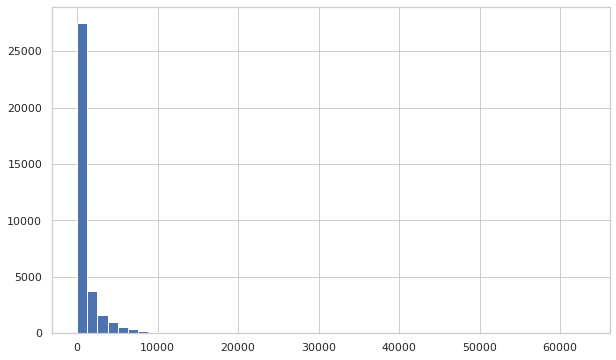

In [ ]:
# Let's look at the distribution of COVID cases
covid['new_case'].hist(bins=50)

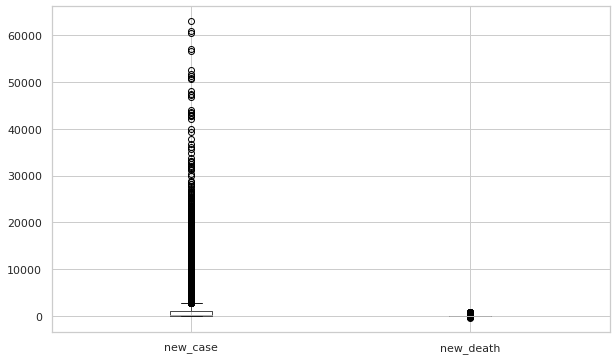

In [ ]:
# Box plot to review shape of the data and any outliers
covid.boxplot(column=["new_case", "new_death"])

We can see that this data is also skewed to the right with multiple outliers in `new_case`.

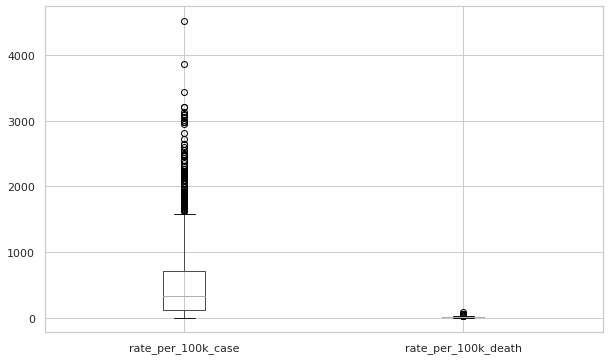

In [ ]:
# Looking at the normalized data
covid_norm.boxplot(column=["rate_per_100k_case", "rate_per_100k_death"])
plt.show()

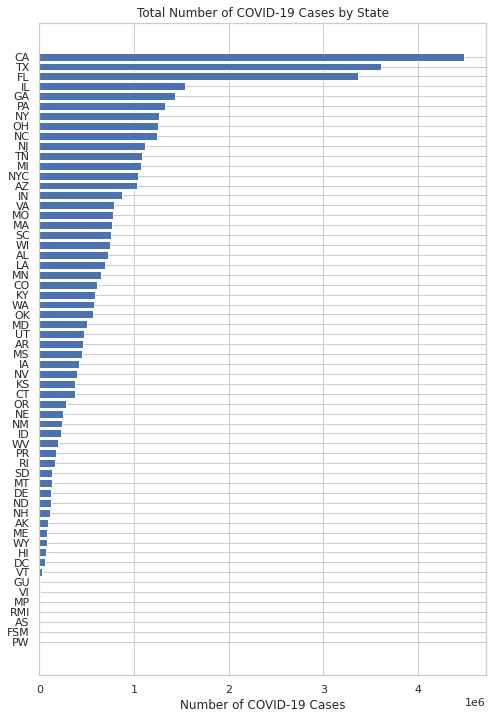

In [ ]:
plt.figure(figsize=(8,12))
# bar plot with matplotlib
covid3=covid3.sort_values("new_case", ascending=True)
plt.barh('state', 'new_case', data=covid3.groupby(['state'], 
          as_index=False).agg({"new_case":"sum"}).sort_values("new_case"))
plt.xlabel('Number of COVID-19 Cases')
plt.title("Total Number of COVID-19 Cases by State")
plt.show()

Without normalizing the data, we can see that overall, CA has had the most COVID-19 cases.

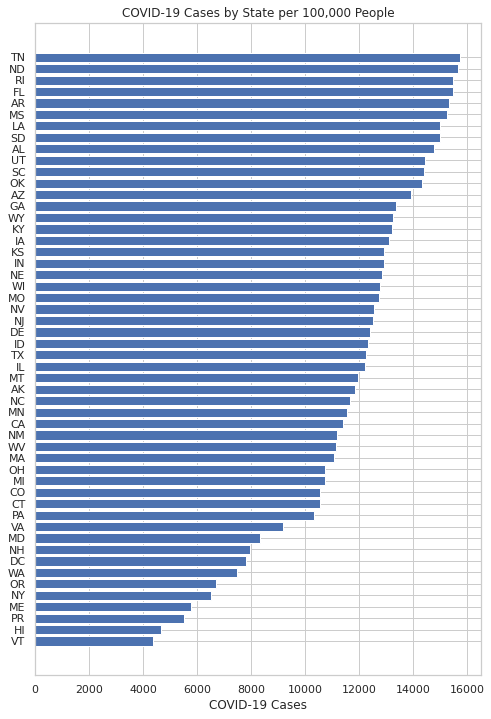

In [ ]:
# Plotting normalized data
plt.figure(figsize=(8,12))
plt.xlabel('COVID-19 Cases')
plt.title('COVID-19 Cases by State per 100,000 People')
plt.barh('state', 'rate_per_100k_case', data=covid_norm.groupby(['state'], 
          as_index=False).agg({"rate_per_100k_case":"sum"}).sort_values("rate_per_100k_case"))
plt.show()

After normalizing the data, we can see that TN, ND, and RI had some of the largest numbers of COVID-19 cases per 100,000 people in the state's population.

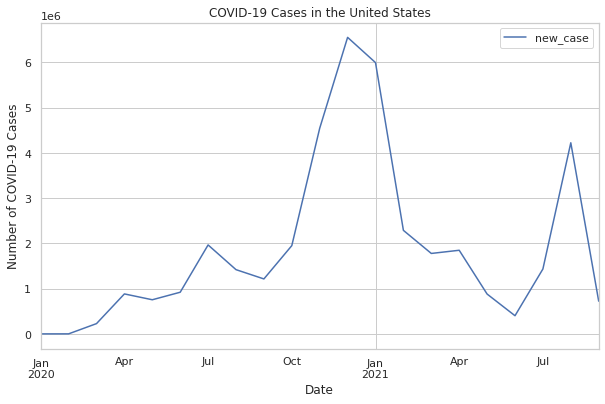

In [ ]:
# Plot a line chart of overall COVID-19 cases
covid2.plot.line(x='date', y='new_case')
plt.title("COVID-19 Cases in the United States")
plt.xlabel("Date")
plt.ylabel("Number of COVID-19 Cases")
plt.show()

This line chart explores how the number of COVID-19 cases has changed month over month. We can see the months were the cases were the highest (during the fall and winter of last year and shortly after the 4th of July this year).

#### Exploring the Merged Data

In [ ]:
# Summary statistics for our merged data
merged.describe()

,year,month,passengers,new_case,new_death,rate_per_100k_case,rate_per_100k_death
count,14.000000,14.000000,1.400000e+01,1.400000e+01,14.000000,14.000000,14.000000
mean,2020.142857,5.785714,3.261687e+07,1.997874e+06,35494.000000,31249.653763,532.287978
std,0.363137,3.786181,2.188832e+07,2.096146e+06,29726.454432,32791.062602,452.206272
min,2020.000000,1.000000,3.333681e+06,5.100000e+01,0.000000,0.944012,0.000000
25%,2020.000000,2.250000,2.522808e+07,7.315625e+05,20309.000000,11492.192737,297.460957
50%,2020.000000,5.500000,2.824157e+07,1.305914e+06,30942.500000,20862.246158,407.940027
75%,2020.000000,8.750000,3.193029e+07,2.118805e+06,43979.750000,37524.673542,711.426348
max,2021.000000,12.000000,8.097166e+07,6.431551e+06,99483.000000,96272.993063,1455.586578


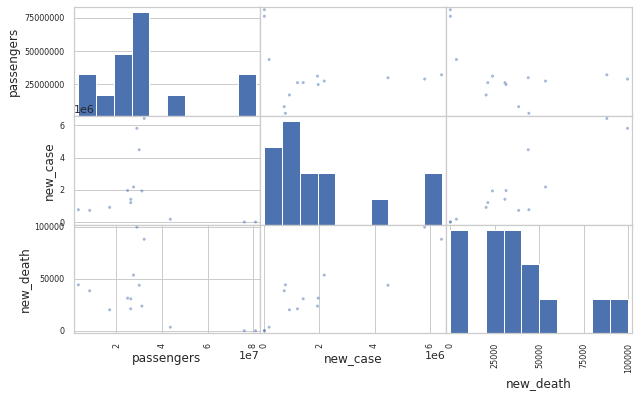

In [ ]:
# Any correlation between variables?
scatter_matrix(merged[['passengers', 'new_case', 'new_death']])
plt.show()

There seems to be a weak linear relationship between all of the variables.

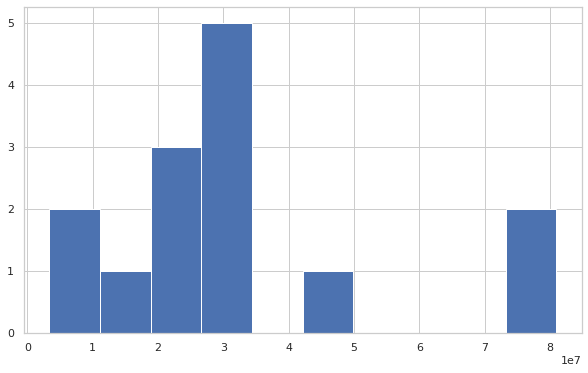

In [ ]:
merged['passengers'].hist(bins=10)
plt.show()

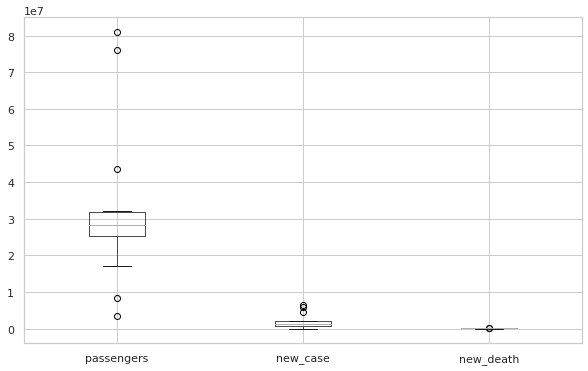

In [ ]:
# Box plot to review shape of the data and any outliers
merged.boxplot(column=["passengers", "new_case", "new_death"])
plt.show()

There is no significant pattern in the histogram, and we can still see that there are a few outliers in the `passengers` variable.

### **Visualizing Travel Trends**

The first COVID-19 case was reported in January of 2020 in the United States. For the sake of this project, I will consider anything prior to the start of 2020 as before the pandemic. January 2020 to present is considered during the pandemic.


#### Change in Passengers from 2019 to 2020

In [ ]:
flightsum

,passengers,distance,carrier_group,quarter,month,distance_group
year,,,,,,
2019,813886554.0,167971643.0,511250,526453,1372836,448563
2020,336386085.0,116729798.0,374625,358251,923956,314241
2021,49035586.0,20044225.0,62620,24667,36185,53207


In [ ]:
flightsum=flightsum.drop(index=2021) # drop 2021 since it is not the full year

#Calculate the percent change
change=round((flightsum.iloc[1,0]-flightsum.iloc[0,0])/(flightsum.iloc[0,0]) * 100,2)
print(change)

-58.67


In [ ]:
# Slope chart: https://community.plotly.com/t/slope-charts-in-plotly/38744
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(y=[flightsum.iloc[0,0], flightsum.iloc[1,0]], mode='lines+markers+text', 
                           text=['2019', '2020'], textposition=['middle left', 'middle right']))
fig.add_shape(type='line', x0=0, x1=0, y0=0, y1=1, xref='x', yref='paper')
fig.add_shape(type='line', x0=1, x1=1, y0=0, y1=1, xref='x', yref='paper')

fig.update_layout(
    title_text='Number of Airline Passengers in the U.S. Decreased by 59% from 2019 to 2020',
    xaxis_showticklabels=False
)

fig.update_yaxes(
        title_text = "Number of Passengers")

fig.show()

The above chart is a slope chart. I used plotly, which is an interactive plotting package to make this chart. The title of the chart highlights the main point; the number of airline passengers decreased dramatically from 2019 to 2020.

#### Most Popular Airlines

Which airline is the most popular based on number of passengers?

**Before the Pandemic**

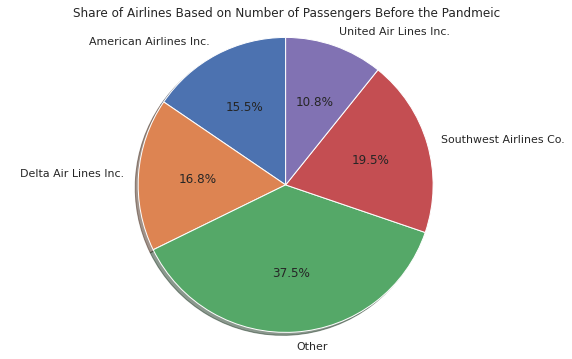

In [ ]:
# Before pandemic
fig1, ax1 = plt.subplots()
ax1.pie(flights_group19['percent'], labels=flights_group19.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of Airlines Based on Number of Passengers Before the Pandmeic")
plt.show()

**During the Pandemic**

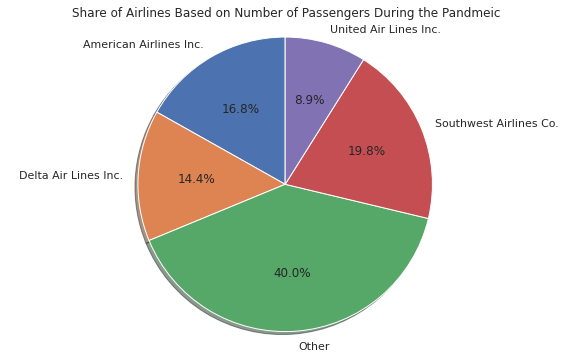

In [ ]:
# DURING PANDEMIC
fig1, ax1 = plt.subplots()

ax1.pie(flights_group20['percent'], labels=flights_group20.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of Airlines Based on Number of Passengers During the Pandmeic")
plt.show()

We can see that Southwest, both before and during the pandemic, is the most popular recognizable airline. Out of all of the passengers that flew before and during the pandemic, 20% flew Southwest. American Airlines became more popular than Delta during the pandemic.

We can also visualize this as stacked bar charts since we tend to perceive angles inaccurately.

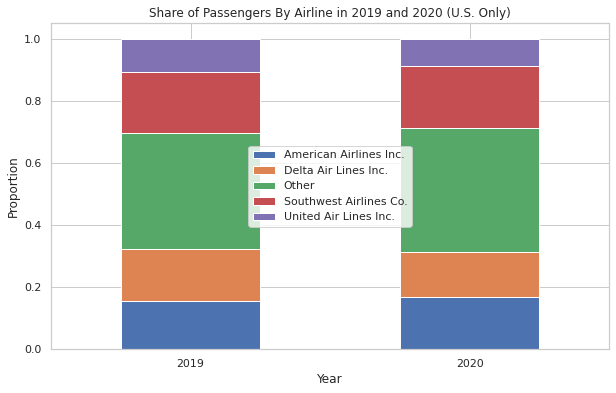

In [ ]:
# Shorten data frames
flights_group19=flights_group19[["percent"]] #include only these columns
flights_group20=flights_group20[["percent"]]

# Take the transpose and add a year column
trans19=flights_group19.T
trans19['Year']=2019

trans20=flights_group20.T
trans20['Year']=2020

# Combine the data
stackedbar=pd.concat([trans19, trans20])

# Create the bar chart
plt.rcParams["figure.figsize"] = (10, 6) # increase the size
stackedbar.set_index('Year').plot(kind='bar', stacked=True)
plt.xticks(rotation = 0) # Make x-axis ticks easy to read
plt.legend(loc="center")
plt.ylabel("Proportion")
plt.title("Share of Passengers By Airline in 2019 and 2020 (U.S. Only)")
plt.show()

In this case, I feel like the pie chart does a better job at showing the breakdown of popular airlines. The pie chart gives us the explicit percents, and we can see the changes easier. It is hard to see the changes in this chart since the values are similar in 2019 and 2020.

#### Most Popular Destinations

What destinations were the most popular based on the number of passengers? We can make a bar chart to show this information. In the code, we need to sort the data for 2019. We want to extract the top 10 destinations. We can find the number of passengers in 2020 for those destinations by converting the destinations to a list and using the `isin()` function.

In [ ]:
import warnings

warnings.simplefilter("ignore")

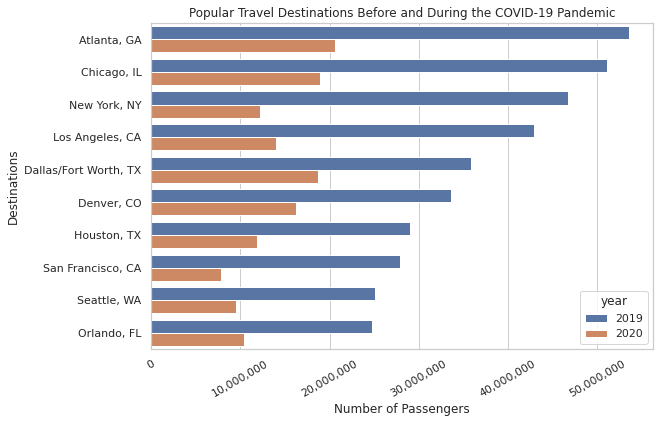

In [ ]:
df1=flights[flights['year']==2019].groupby(['dest_city_name'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)
new1=df1.iloc[:10]
new1.loc[:,'year']=2019

# Turn the column of popular destinations in 2019 to a list
pop_dest=new1['dest_city_name'].tolist()

df2=flights[flights['year']==2020].groupby(['dest_city_name'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)
#new2=df2.iloc[:10]
#new2['year']="2020-2021"

# Make a subset data frame that contains lists the number of passengers for each
# of the popular destinations in 2019
new3=df2[df2['dest_city_name'].isin(pop_dest)]
new3.loc[:,'year']="2020"

test=pd.concat([new1,new3])
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(x="passengers", y="dest_city_name", 
            data=test, hue="year").set(title='Popular Travel Destinations Before and During the COVID-19 Pandemic', 
                                       xlabel='Number of Passengers', ylabel='Destinations')
plt.ticklabel_format(style='plain', axis='x') #remove scientific notation
# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation = 30) # Rotates X-Axis Ticks by 45-degrees
plt.show()

By looking at the above bar chart, we can see the most popular travel destinations in 2019 (blue bars). We also can see how the number of passengers changes for those same destinations during the pandemic. Less people were traveling to those places during the pandemic, and some destinations became less popular (Seattle, San Franscisco, New York). I wonder if this is because of the COVID-19 cases in those states. We will explore that soon.

What if we look at the most popular destinations in 2020? We can transform the code slightly to check this out.

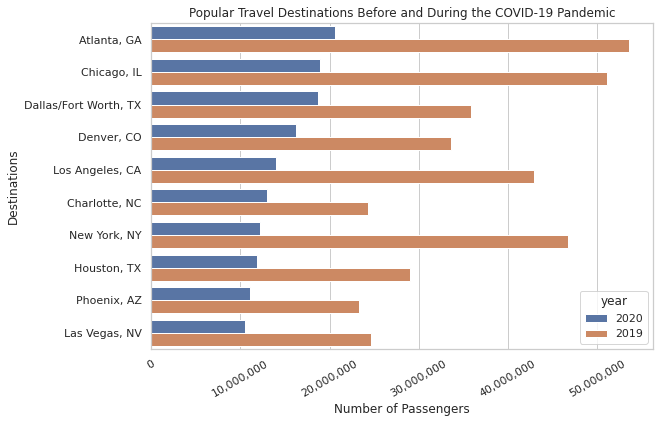

In [ ]:
new2=df2.iloc[:10]
new2['year']="2020"

# Turn the column of popular destinations in 2020 to a list
pop_dest2=new2['dest_city_name'].tolist()

# Make a subset data frame that contains lists the number of passengers for each
# of the popular destinations in 2019
new4=df1[df1['dest_city_name'].isin(pop_dest2)]
new4.loc[:,'year']="2019"

test=pd.concat([new2,new4])
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(x="passengers", y="dest_city_name", 
            data=test, hue="year").set(title='Popular Travel Destinations Before and During the COVID-19 Pandemic', 
                                       xlabel='Number of Passengers', ylabel='Destinations')
plt.ticklabel_format(style='plain', axis='x') #remove scientific notation
# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation = 30) # Rotates X-Axis Ticks by 45-degrees
plt.show()

We can see that the ranking changed ever so slightly. Rather than New York being the third most popular destinaiton, Dallas/Fort Worth is in third place. Orlando, FL and Seattle, WA also got removed from the chart. Is this because of their COVID-19 case count?

In [ ]:
# Change date format so the slider works in the right order for the COVID-19 visualizations
merged2['date1']=pd.to_datetime(merged2['date'])
merged2["date1"] = pd.to_datetime(merged2["date"]).dt.strftime('%Y %m')
merged2['date1']=merged2['date'].astype('string')

I have made two interactive maps to show how the number of passengers has changed by state from before the pandemic to during the pandemic. 

In [ ]:
# Source: https://plotly.com/python/choropleth-maps/
import plotly.express as px
import plotly.graph_objects as go

newmerged2=merged2.sort_values(by="date1")

fig = px.choropleth(newmerged2, locations="state",
                    color="passengers",
                    hover_name="state", # column to add to hover information
                    color_continuous_scale="Reds", 
                    scope="usa", 
                    locationmode='USA-states',
                    animation_frame="date1")

fig.update_layout(
    title_text='Number of Airline Passengers by Destination State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)')
)

fig.show()

We can see that the darkest states have some of the highest numbers of passengers. Those states are California, Texas, Florida, Colorado, Georgia, and North Carolina. These states also contain some popular airports.

In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(newmerged2, locations="state", locationmode="USA-states",
                     hover_name="state", size="passengers",
                     animation_frame="date1",
                     projection="natural earth",
                     title="Bubble Map of the Number of Airline Passengers by Destination State")
fig.show()

The most interesting thing in this bubble map is that we can see how the size of the bubbles decreases dramatically from March 2020 to April 2020. The COVID-19 pandemic is likely the cause of this anomaly!

#### International Flights

How did the number of passengers change for US and international flights?


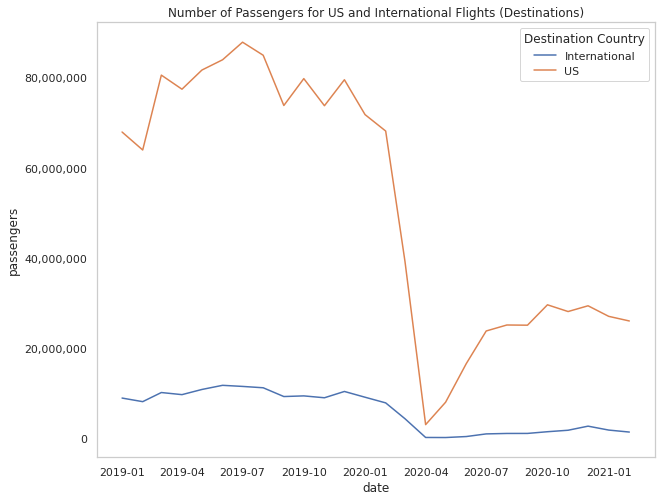

In [ ]:
# Line chart - two lines - one for international, one for US, make line chart showing
# of passengers by month

# If the country is not US, then change the name to International
flights['origin_country2']=flights['origin_country'].apply(lambda x: x if x=="US" else "International")
flights['dest_country2']=flights['dest_country'].apply(lambda x: x if x=="US" else "International")
intl_o=flights.groupby(['date', 'origin_country2'], as_index=False).agg({"passengers": "sum"})
intl_d=flights.groupby(['date', 'dest_country2'], as_index=False).agg({"passengers": "sum"})

# Make the line chart for the origin dest
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=intl_d, x="date", y="passengers", hue="dest_country2")
plt.title("Number of Passengers for US and International Flights (Destinations)")
plt.legend(title="Destination Country")
ax.grid(False) # remove gridlines

# format axis labels
plt.ticklabel_format(style='plain', axis='y') #remove scientific notation
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

By looking at the line chart, we can see that the number of passengers decreased dramatically from March to April for both US and international flights. The numbr of passengers started increasing again in the summer time, but the numbers are no where near where they were pre-pandemic.

What was the percentage of international flights?

In [ ]:
# Make two stacked bar charts - one for before pandemic, one for after
# showing the breakdown of # of passengers for US vs international

#Before Pandemic
usintl19=flights[flights['year']==2019].groupby(['dest_country2'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)
#Create a column that shows the proportion of US vs international flights
usintl19['prop']=usintl19.passengers/usintl19.passengers.sum()
usintl19['year']=2019

#Pandemic
usintl20=flights[flights['year']==2020].groupby(['dest_country2'], as_index=False).agg({"passengers": "sum"}).sort_values('passengers', ascending=False)
#Create a column that shows the proportion of US vs international flights
usintl20['prop']=usintl20.passengers/usintl20.passengers.sum()
usintl20['year']=2020

usintl=pd.concat([usintl19, usintl20])
usintl

,dest_country2,passengers,prop,year
1,US,935331988.0,0.885564,2019
0,International,120867512.0,0.114436,2019
1,US,368343030.0,0.920505,2020
0,International,31810049.0,0.079495,2020


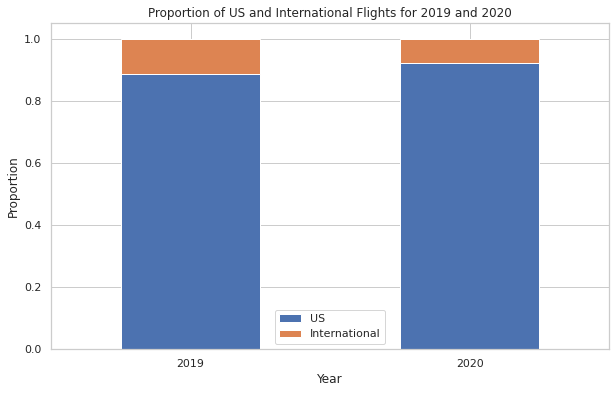

In [ ]:
usintldf = {'Year':[2019, 2020],
        'US':[0.885564, 0.920505],
        'International': [0.114436, 0.079495]}
  
# Create DataFrame
usintldf = pd.DataFrame(usintldf)

# Create the bar chart
usintldf.set_index('Year').plot(kind='bar', stacked=True)
plt.xticks(rotation = 0) # Make x-axis ticks easy to read
plt.legend(loc=8)
plt.ylabel("Proportion")
plt.title("Proportion of US and International Flights for 2019 and 2020")
plt.show()

In these stacked bar charts, we can see that the majority of the flights in our data set had destinations in the US. Although, we can see that the proportion of internationl flights decreased slightly from 2019 to 2020. This is likely because of the travel bans that were put into place preventing international travel due to COVID-19.

### **Visualizing COVID-19 Trends**

Earlier, we made a DataFrame that consists of the 7-day moving average of the total number of COVID-19 cases in the United States. We can visualize the moving average as a line chart to get an overall trend of how the case numbers have changed over time. After that, we can explore some visualizations that highlight differences among the states.

How have COVID-19 cases changed over time by state?

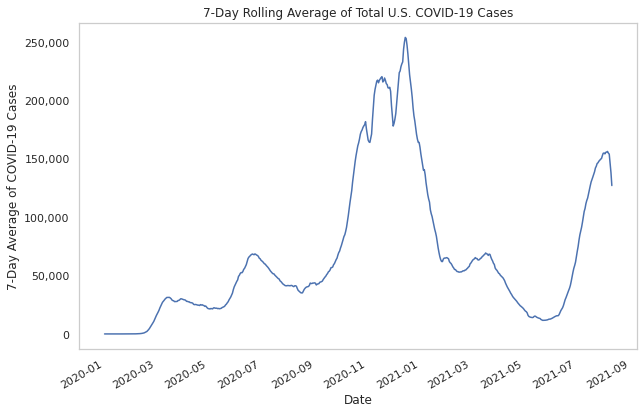

In [ ]:
sns.lineplot(data=rolling, x="submission_date", y="7dayave")
plt.title("7-Day Rolling Average of Total U.S. COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("7-Day Average of COVID-19 Cases")
plt.grid(False) # remove gridlines

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) # adds commas
plt.xticks(rotation = 30) # Rotates X-Axis Ticks by 30-degrees
plt.show()

In [ ]:
# We can also make the chart with annotations/interaction
import plotly.express as px

fig = px.line(rolling, x='submission_date', y="7dayave")

fig.update_layout(title='7-Day Rolling Average of Total U.S. COVID-19 Cases',
                   xaxis_title='Date',
                   yaxis_title='7-Day Rolling Average', 
                   plot_bgcolor='white')

fig.show()

This chart is similar to the charts you see published around the internet. We can see the big COVID-19 spike during last winter. We can also see the beginning of the spike that occurred this fall due to the Delta variant.

In [ ]:
# source: https://plotly.com/python/bubble-maps/
import plotly.express as px
df = px.data.gapminder()
nm=covid_norm.sort_values(by="date")
fig = px.scatter_geo(nm, locations="state", locationmode="USA-states",
                     hover_name="name", size="rate_per_100k_case",
                     animation_frame="date",
                     projection="natural earth",
                     title="Bubble Map of Normalized COVID-19 Cases in the U.S. by Month")
fig.show()

The above animated bubble chart shows how the COVID-19 cases have changed over time for each state. We can see the states that become hot spots by the larger bubble sizes, which indicate more COVID-19 cases.

In [ ]:
# Source: https://plotly.com/python/choropleth-maps/
import plotly.express as px
import plotly.graph_objects as go

fig = px.choropleth(nm, locations="state",
                    color="rate_per_100k_case",
                    hover_name="name", # column to add to hover information
                    color_continuous_scale="Blues", 
                    scope="usa", 
                    locationmode='USA-states',
                    animation_frame="date")

fig.update_layout(
    title_text='COVID-19 Cases (Normalized) in the United States by State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)')
)

fig.show()

This is another visualization showing the total number of COVID-19 cases for each state. I have selected a color scale that changes in saturation since the number of COVID-19 cases in a quantitative variable. The slider lets you look at the values for each month from the start of the pandemic to September of 2021.

### **Visualizations Exploring the Relationship Between Traveling and COVID-19 Cases**

Let's make some visualizations to explore the relationship between travel and COVID-19 trends. We will use our merged data sets.

#### Small Multiples Line Charts - U.S. Overview

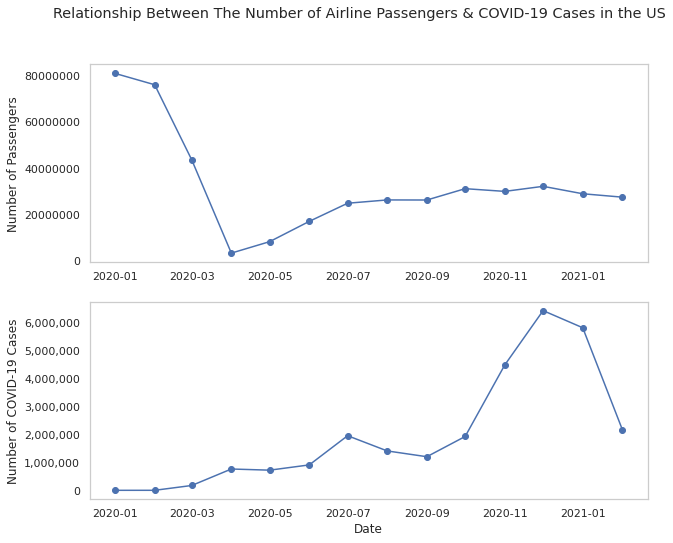

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,8))
fig.suptitle('Relationship Between The Number of Airline Passengers & COVID-19 Cases in the US')

ax1.plot(merged['date'], merged['passengers'], marker="o")
ax1.set(ylabel="Number of Passengers")
ax2.plot(merged['date'], merged['new_case'], marker="o")
ax2.set(xlabel="Date", ylabel="Number of COVID-19 Cases")
ax1.grid(False) # remove gridlines
ax2.grid(False) # remove gridlines

ax1.ticklabel_format(style='plain', axis='y') #remove scientific notation
ax2.ticklabel_format(style='plain', axis='y') #remove scientific notation
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

These charts reveal interesting information. The first chart shows how the number of airline passengers has changed from the start of the pandemic to February of 2021. The bottom chart visualizes the number of COVID-19 cases in the United States by month. We can see that in March and April when the COVID-19 lockdowns started, the number of airlines passengers decreased. Although, even when the number of cases started increasing, people still seemed interesed in traveling, just not as much as before the pandemic.

#### Scatter Plots & Linear Regression

Scatter plots are used to explore relationships between to quantitative variables. Linear regression models help us figure out if there is a linear relationship between variables and how strong that relationship is. Let's look at the relationship between the monthly number of U.S. COVID-19 cases and the monthly number of airline passengers.

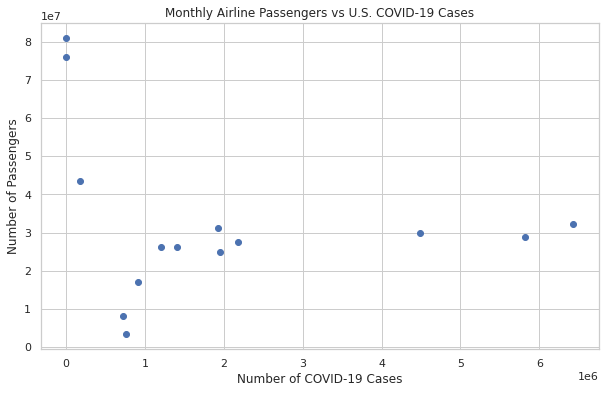

In [ ]:
plt.scatter(merged['new_case'], merged['passengers'])
plt.title("Monthly Airline Passengers vs U.S. COVID-19 Cases")
plt.ylabel("Number of Passengers")
plt.xlabel("Number of COVID-19 Cases")
plt.show()

This pattern is not what I would expect. Well, there actually does not seem to be much of a pattern. I was expecting a negative linear relationship. It would make sense that the number of airline passengers would decrease as the number of COVID-19 cases increase. Although, that is not what this scatter plot shows!

What if we looked at the scatterplot with a different version of our data? Here, we are looking at the data for all of the states for each month.

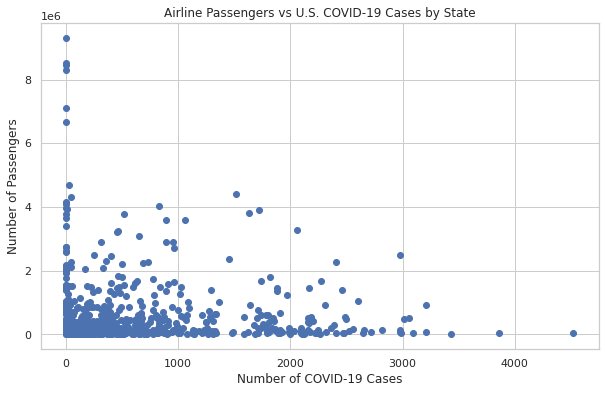

In [ ]:
plt.scatter(merged2['rate_per_100k_case'], merged2['passengers'])
plt.title("Airline Passengers vs U.S. COVID-19 Cases by State")
plt.ylabel("Number of Passengers")
plt.xlabel("Number of COVID-19 Cases")
plt.show()

There does not seem to be a linear pattern here. Let's remove the dates at the very beginning of the pandemic (Jan 2020, Feb 2020, and March 2020).

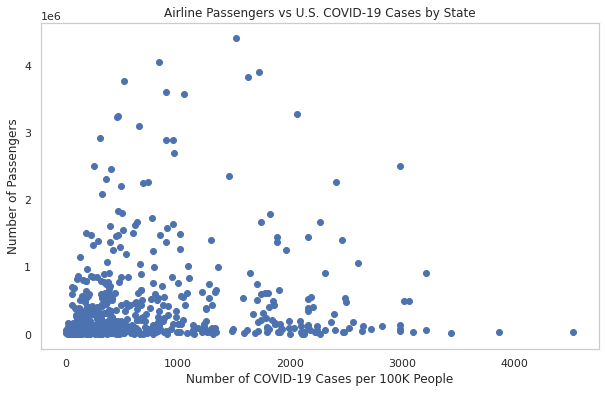

In [ ]:
merged3=merged2[(merged2['date'] != "2020-01-01") & (merged2['date'] != "2020-02-01") & (merged2['date'] != "2020-03-01")]
plt.scatter(merged3['rate_per_100k_case'], merged3['passengers'])
plt.title("Airline Passengers vs U.S. COVID-19 Cases by State")
plt.ylabel("Number of Passengers")
plt.xlabel("Number of COVID-19 Cases per 100K People")
plt.show()

The pattern is not what I was expecting. I was expecting to see a negative linear relationship, meaning that as the number of COVID-19 cases increases, the number of passengers decreases. Even though the data does not look fitting for a linear model, I am curious to see what happens if I try it.

In [ ]:
### Linear regression model
import statsmodels.formula.api as smf

model=smf.ols(formula='passengers ~ rate_per_100k_case', data=merged3)
results_formula=model.fit()

print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:             passengers   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.555
Date:                Fri, 10 Dec 2021   Prob (F-statistic):             0.0188
Time:                        16:55:13   Log-Likelihood:                -8276.4
No. Observations:                 557   AIC:                         1.656e+04
Df Residuals:                     555   BIC:                         1.657e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.647e+05   4.14

Looking at our R-squared value, we can see that linear regression does not explain the relationships in our data well.

In [ ]:
# Use the machine learning package to create the same regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
merged3['constant']=1
X=merged3[['constant','rate_per_100k_case']].values
y=merged3['passengers'].values
reg.fit(X, y)

LinearRegression()

In [ ]:
print('Linear regression with Scikit: Rate per 100K COVID-19 Cases vs # of Passengers')
print('Intercept=', round(reg.intercept_,4), 'Slope=', round(reg.coef_[1],4))

Linear regression with Scikit: Rate per 100K COVID-19 Cases vs # of Passengers
Intercept= 364715.9218 Slope= 90.2684


To visualize our regression line, we can add it to our scatter plot.

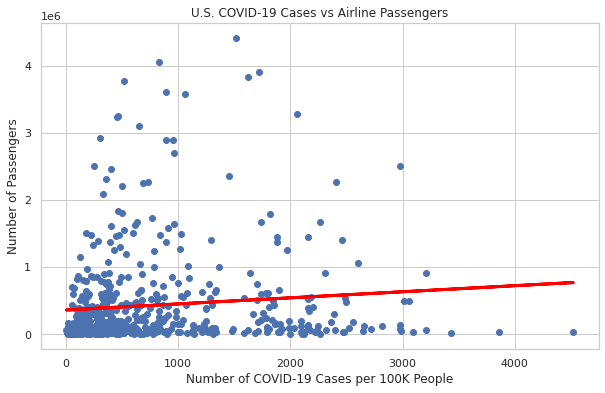

In [ ]:
plt.scatter(merged3['rate_per_100k_case'], merged3['passengers'])
plt.title("U.S. COVID-19 Cases vs Airline Passengers")
plt.ylabel("Number of Passengers")
plt.xlabel("Number of COVID-19 Cases per 100K People")
plt.plot(X, reg.intercept_+reg.coef_[1]*X,color='red',lw=3)
plt.show()

We can see that linear regression was not the most appropriate model here. That is okay. Linear regression is a good place to start, but it absolutely does not fit every data set. An important part of data science is trying multiple models to find the most appropriate one for your data and for your objectives.

What if we looked at the scatter plot for just Florida data? Florida was constantly on the news for being unable to contain their COVID-19 cases.

In [ ]:
# Make a DF of just FL data
FL=merged3[merged3['state']=="FL"]

In [ ]:
# Make a linear regression model
reg = linear_model.LinearRegression()
FL['constant']=1
X=FL[['constant','rate_per_100k_case']].values
y=FL['passengers'].values
reg.fit(X, y)

LinearRegression()

In [ ]:
# Another regression model, print the summary statistics
model=smf.ols(formula='passengers ~ rate_per_100k_case', data=FL)
results_formula=model.fit()

print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:             passengers   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     10.18
Date:                Fri, 10 Dec 2021   Prob (F-statistic):             0.0110
Time:                        16:55:13   Log-Likelihood:                -166.14
No. Observations:                  11   AIC:                             336.3
Df Residuals:                       9   BIC:                             337.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.283e+06   5.16

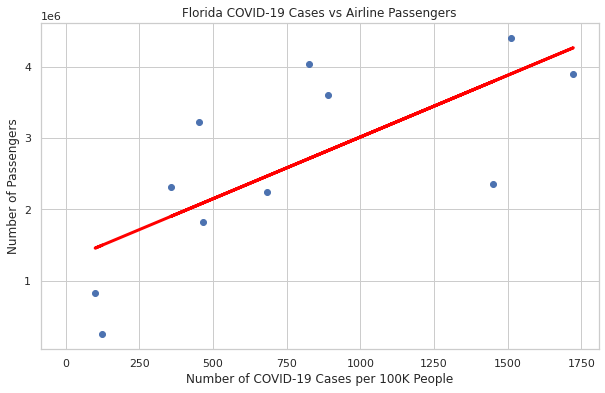

In [ ]:
# Scatter plot
plt.scatter(FL['rate_per_100k_case'], FL['passengers'])
plt.title("Florida COVID-19 Cases vs Airline Passengers")
plt.ylabel("Number of Passengers")
plt.xlabel("Number of COVID-19 Cases per 100K People")
plt.plot(X, reg.intercept_+reg.coef_[1]*X,color='red',lw=3)
plt.show()

The data in Florida shows more of a linear relationship than our previous charts. The R^2 value is 0.531, meaning 53.1% of the variation in the number of airline passengers is explained by the variation in COVID-19 cases. We could attempt to extend this to other states as needed.

#### State Analysis

Are there stately differences between the number of passengers arriving into a state and the number of COVID-19 cases for that state? Since a scatter plot and linear regression model was not overly effective, let's try a different set of visualizations.

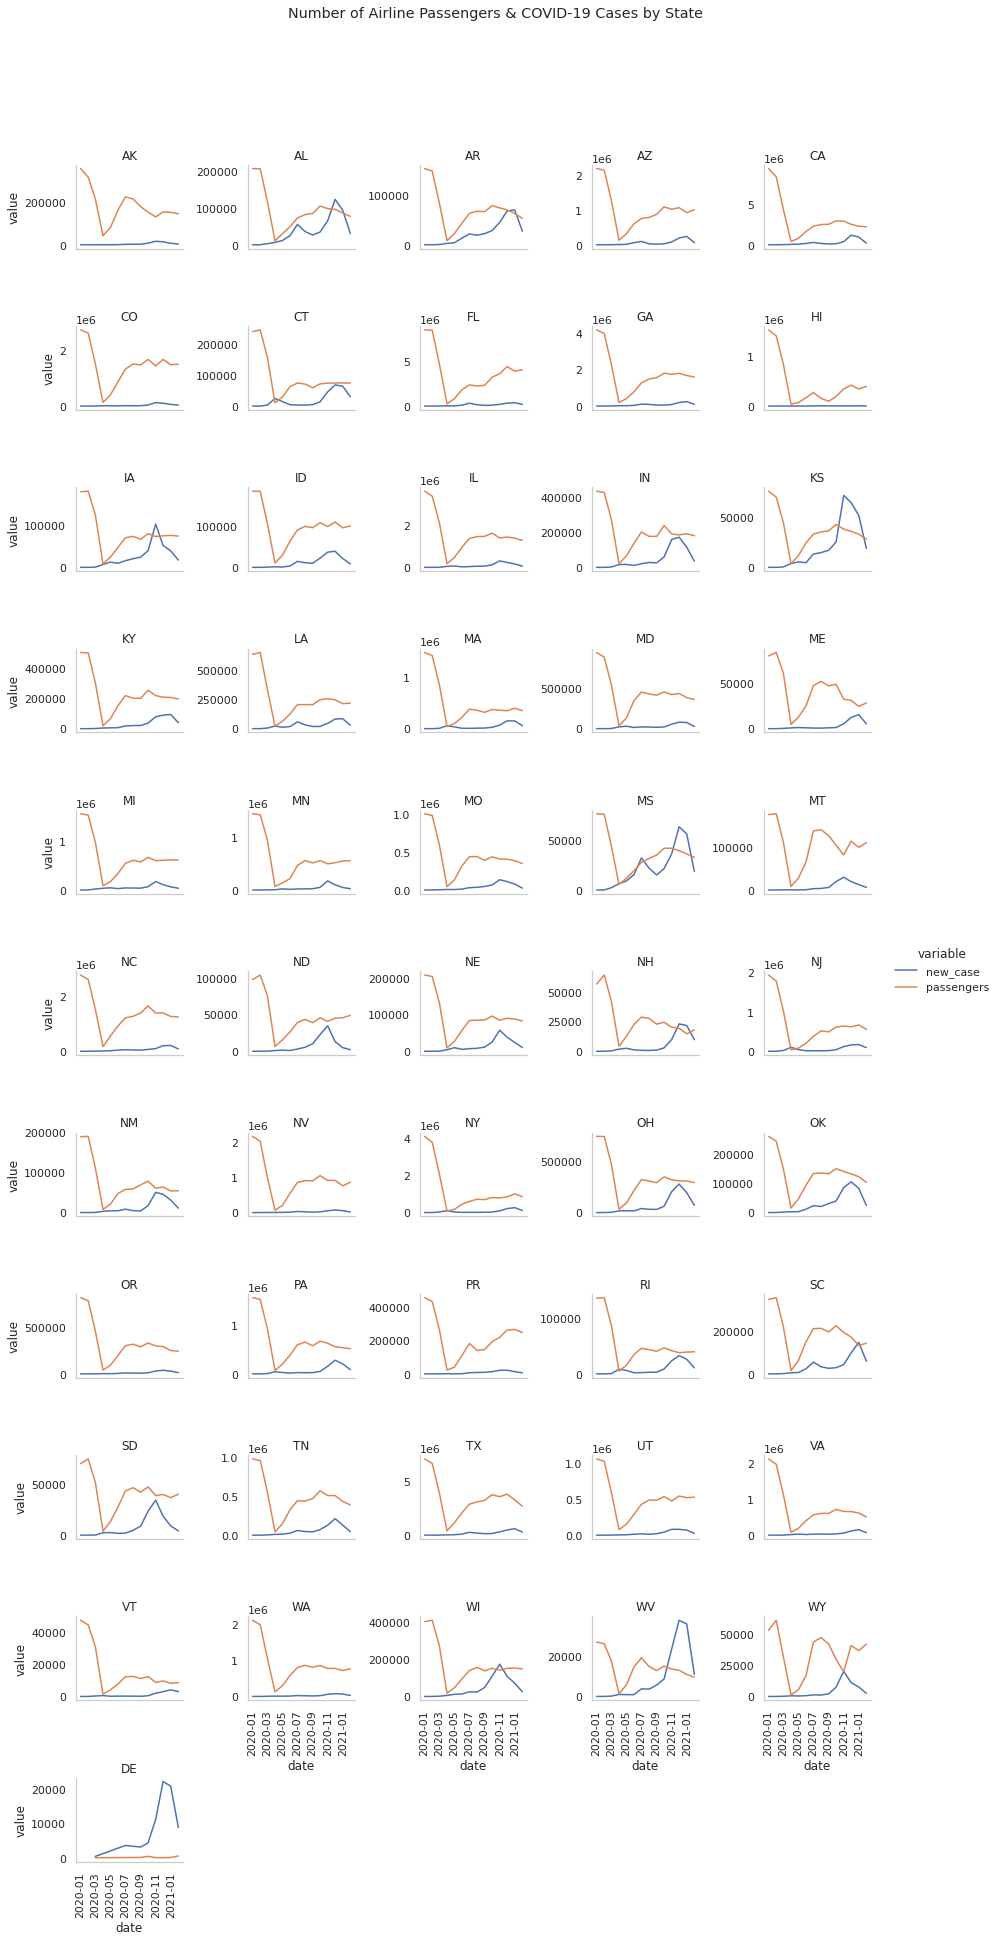

In [ ]:
# Number of new cases and airline passengers by state
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.FacetGrid(merged_long, col='state', height=2.5, col_wrap=5, hue="variable", sharey=False).map(sns.lineplot, 'date', 'value', ci=None).add_legend()
g.set_titles(col_template="{col_name}").set_xticklabels(rotation=90)
g.tight_layout()
g.fig.subplots_adjust(top=0.9) # adjust the Figure
g.fig.suptitle('Number of Airline Passengers & COVID-19 Cases by State')
plt.show()

This small multiples line chart was challenging to make. I would say a limitation of Python is its charting abilities. I have worked in other software, such as R, and small multiples charts are very easy to make.

To make this chart, I had to "melt" the merged data into long format. Next, I used Seaborn's `FacetGrid()` function to make the small multiples chart. Since I had the data in long format, I could separate the COVID-19 case numbers and the passenger variables by hue. I initially used the `rate_per_100k_case` variable, but since there was such a difference in the value of COVID cases and passengers, the COVID-19 data showed as a straight line on the chart. Instead, I used the non-normalized case number data.

When we were exploring the most popular travel destinations in 2019 and 2020, some of the top 10 travel destinations changed. I wonder what the COVID-19 case numbers look like in the most popular travel destinations in 2019. Are the COVID-19 case counts a factor that changed their popularity? The most popular places to travel to in 2019 were Atlanta, GA, Chicago, IL, New York, NY, Los Angeles, CA, Dallas/Fort Worth, TX, Denver, CO, Houston, TX, San Francisco, CA, Seattle, WA, and Orlando, FL. Let's examine the combined data further in just those states.

In [ ]:
# List for popular destinations in 2019
pop_states=["GA", "IL", "NY", "CA", "TX", "CO", "WA", "FL"]
closerlook=merged_long[merged_long['state'].isin(pop_states)]

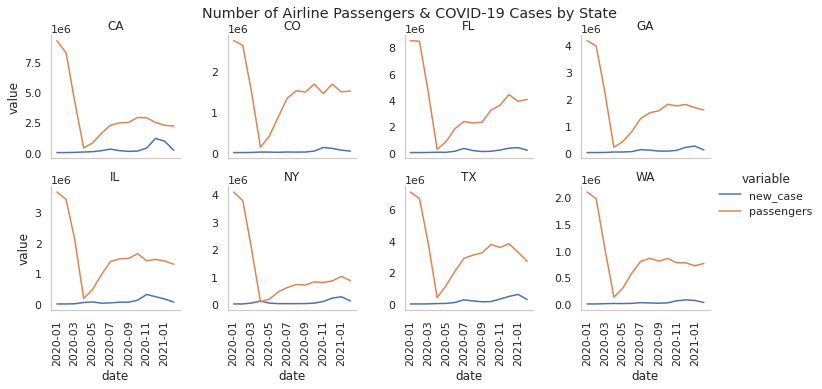

In [ ]:
g = sns.FacetGrid(closerlook, col='state', height=2.5, col_wrap=4, hue="variable", sharey=False).map(sns.lineplot, 'date', 'value', ci=None).add_legend()
g.set_titles(col_template="{col_name}").set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Airline Passengers & COVID-19 Cases by State')
plt.show()

Let's look at the small multiples charts of just the case count.

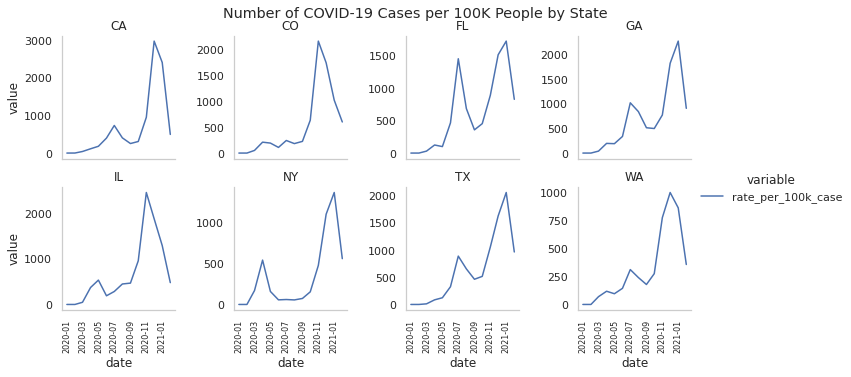

In [ ]:
# Looking at normalized case rate
merged_long2=pd.melt(merged2, id_vars=['date', 'state'], value_vars=['rate_per_100k_case', 'passengers'])
closerlook2=merged_long2[merged_long2['state'].isin(pop_states)]

# Only looking at COVID cases
closerlook2=closerlook2[closerlook2['variable']=="rate_per_100k_case"]

# Create charts
g = sns.FacetGrid(closerlook2, col='state', height=2.5, col_wrap=4, hue="variable", 
                  sharey=False).map(sns.lineplot, 'date', 'value', ci=None).add_legend()
g.set_titles(col_template="{col_name}").set_xticklabels(rotation=90, size=8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Number of COVID-19 Cases per 100K People by State')
plt.show()

We can see that the majority of these states have two major peaks in their COVID-19 cases, especially Florida, Georgia, New York, and Texas.

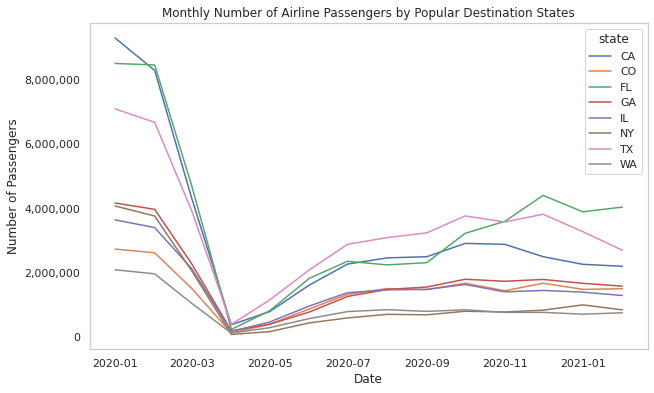

In [ ]:
# Make a DF just with these states showing number of passengers
linechart=closerlook=merged2[merged2['state'].isin(pop_states)]

sns.lineplot(data=linechart, x="date", y="passengers", hue="state")
plt.title("Monthly Number of Airline Passengers by Popular Destination States")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
# Change y labels to actual #s rather than scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.show()

This is an interesting chart. From our COVID-19 visualizations, we learned that Florida and Texas had a lot of cases consistently throughout the height of the pandemic. By looking at this line chart, we can see that these states saw people traveling to them relatively quickly after the intial lockdowns were over.

## **Summary** 

### **Highlights** 

**Main Goals & Purpose of Analysis**
* Merge and clean multiple data sets
* Perform exploratory data analysis
* Practice data wrangling
* Analyze U.S. travel trends in 2019 versus travel trends during the COVID-19 pandemic (i.e. most popular airlines, common destinations and travel months, number of people traveling, total number of flights, the number of international flights, etc.)
* Determine if there is a relationship between number of positive U.S. COVID-19 cases vs number of people traveling on airplanes
* Create interactive visualizations that display popular U.S. travel destinations and airlines before and during the pandemic
* Create visualizations that show COVID-19 trends in the U.S.

*The overall design of the project and the final outcome is  a series of visualizations that explore two main topics: how travel trends have changed over time and how COVID-19 has impacted the travel industry.*

**Target Audience**
* The target audience for this project is anyone who is interested in learning about how COVID-19 has impacted the travel industry. Airlines can use this data to see trends between COVID-19 cases and travel destinations and which airlines have remained popular throughout the pandemic.

**Measurement of Success**
* This project will be considered a success if the users learn something new about travel trends around the time of the COVID-19 pandemic. The visualizations should be easy to understand and insightful. 

**Recap of Techniques & Design Decisions**
* Techniques
 * The tools/technologies I used for this project included Google Colab and numerous Python libraries. 
 * The pandas library was an essential tool for loading, organizing, cleaning, and merging my data.
 * I used a lot of the plotting libraries (matplotlib, seaborn, plotly, etc.) to create explanatory visualizations, which is the end goal of the project.
  * I used sklearn to try to fit a linear regression model to my data.
* Design Decisions
  * Some design decisions I made were to remove unnecessary data columns and to fill in missing COVID-19 data with 0 values.
  * I decided to normalized the COVID-19 case data when looking at the data by state.
  * The first COVID-19 case was reported in January of 2020 in the United States. For the sake of this project, I will consider anything prior to the start of 2020 as before the pandemic. January 2020 to present is considered during the pandemic.

**Key Findings**
* In March of 2020 (the start of the pandemic), the number of airline passengers decreased dramatically. 
* People still continued to travel after the initial lockdown was over; however, people were not traveling at the rate at which they were prior to the pandemic. 
* The number of international flights decreased from 2019 to 2020.
* The most popular travel destinations changed from 2019 to 2020. The top 4 travel destinations in 2019 were Atlanta, Chicago, New York, and Los Angeles. The top 4 travel destinations in 2020 were Atlanta, Chicago, Dallas, and Denver. 
* In 2019 and 2020, Southwest was the most popular airline. In 2020, American Airlines passed Delta Airlines as the second most popular airline, which was a change from the prior year.

**Evaluations**
* The visualizations I created were labeled clearly, easy to understand, and insightful. My interactive visualizations captivated and engaged the users. Anyone who is interested in traveling could learn something new about the industry by exploring the results of this analysis.
* Linear regression was not the most appropriate model to use to predict the number of airline passengers based on the number of COVID-19 cases. I evaluated my model by looking at the scatter plot of the data and then by examining certain metrics like R^2, adjusted R^2, and the p-values for the coefficients. With additional time, the data could be transformed or different variations of the model could be made to make it more effective.

### **Conclusions & Future Work**

Overall, this data project allowed me to practice important Python programming techniques. I loaded multiple data sets, cleaned the data, and explored the data. I was able to create visualizations, some being interactice, that highlighed important findings about the data. From the data, we learned that the number of airline passengers definitely decreased at the start of the pandemic. To my surprise, there was not a linear relationship among the number of airline passengers and the number of COVID-19 cases.

This analysis can be extended in multiple ways. As the pandemic progresses and additional airline data is released, that data can be added to this analysis to explore the relationships further. In addition, I did not find a suitable model for my data. Different modeling techniques could be applied to the data to explore the relationship between COVID-19 cases and the number airline passengers. Lastly, since the airlines lost so many passengers due to the pandemic, an entire analysis on airline profitability would be interesting work. An analysis of COVID-19's impact on airline profitablility could reveal interesting insights about the industry's current state and how they plan on recovering after such a large decline in passengers.


### **Video Presentation**

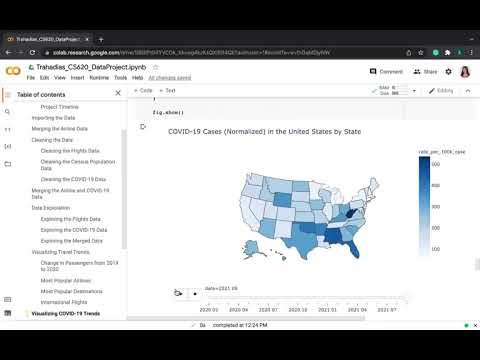

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('0exWvzFxypg')

## **References**

* https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/
* https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH
* https://www.reddit.com/r/GoogleColab/comments/k6qpff/using_an_image_located_in_google_drive_in_colab/
* https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EEE&Yv0x=D
* https://plotly.com/python/gantt/
* https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
* https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
* https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python
* https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
* http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
* https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_United_States
* https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels
* https://plotly.com/python/bubble-maps/
* https://plotly.com/python/choropleth-maps/ 
* https://www.codegrepper.com/code-examples/python/frameworks/django/how+to+increase+figure+size+in+seaborn
* https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
* https://www.marsja.se/seaborn-line-plots-multiple/
* https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
* https://community.plotly.com/t/slope-charts-in-plotly/38744
* https://stackoverflow.com/questions/61693014/how-to-hide-plotly-yaxis-title-in-python
* https://plotly.com/python/axes/
* https://plotly.com/python/line-charts/
* https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot